# **MODEL PREDIKTIF KAMPANYE PEMASARAN BANK HFK**  

**Grup Beta**
- **Haekal Ravi Rasyid**
- **Karina Fidelia Ramadhani**
- **Muhammad Fawwaz Ananda**
---

## **Bussiness Problem**

#### **Context**  
Bank HFK merupakan bank yang berbasis di Portugal dan saat ini sedang memfokuskan strategi bisnisnya pada pengembangan produk deposito berjangka (term deposit). Term deposit sendiri adalah produk simpanan bank di mana nasabah menyimpan uangnya untuk jangka waktu tertentu dengan tingkat bunga tetap, dan dana tersebut tidak dapat ditarik sebelum jatuh tempo tanpa penalti.

Saat ini, produk term deposit menjadi salah satu sumber pendapatan utama bank. Namun tingkat keberhasilannya sangat dipengaruhi oleh kondisi ekonomi makro, perilaku nasabah, serta efektivitas strategi pemasaran langsung melalui panggilan telepon.  

Dalam beberapa periode kampanye, Bank HFK menghadapi tantangan berupa ketidakstabilan kondisi ekonomi lokal, yang tercermin dari indikator seperti tingkat pengangguran, suku bunga Euribor, indeks kepercayaan konsumen, dan jumlah tenaga kerja. Kondisi ini menyebabkan respons nasabah terhadap penawaran deposito berjangka menjadi semakin sulit diprediksi.

#### **Problem Statement**  
Strategi pemasaran yang selama ini digunakan Bank HFK masih bersifat mass targeting, di mana sebagian besar nasabah dihubungi tanpa mempertimbangkan probabilitas keberhasilan secara mendalam. Pendekatan ini menimbulkan dua masalah utama:  

* Inefisiensi biaya operasional, karena banyak nasabah yang dihubungi tidak tertarik berlangganan deposito berjangka.  

* Hilangnya peluang pendapatan, ketika nasabah yang sebenarnya berpotensi justru tidak teridentifikasi dan tidak dihubungi tepat waktu, terutama dalam kondisi ekonomi yang kurang mendukung.  

Tanpa pendekatan berbasis data, Bank HFK kesulitan menyesuaikan strategi pemasaran dengan dinamika ekonomi dan karakteristik nasabah, serta berpotensi menurunkan citra bank di mata nasabah karena terkesan mengganggu.



#### **Bussiness Goals** 
Oleh karena itu, Bank HFK membutuhkan sebuah pendekatan berbasis data untuk memahami karakteristik nasabah yang memiliki kecenderungan lebih tinggi untuk berlangganan deposito berjangka, dengan memanfaatkan data historis hasil kampanye pemasaran sebelumnya yang mencakup profil demografis nasabah, riwayat interaksi kampanye, serta indikator kondisi sosial dan ekonomi. Bank HFK ingin membangun model prediktif yang mampu mengklasifikasikan apakah seorang calon nasabah berpotensi akan berlangganan deposito (**yes**) atau tidak (**no**) sebelum dilakukan panggilan pemasaran.  

Model prediktif ini kemudian dapat dimanfaatkan oleh beberapa pihak, yaitu:  

| No | Stakeholder              | Peran |
|----|--------------------------|-------|
| 1  | Tim Marketing dan Sales  | Menentukan daftar nasabah prioritas yang akan dihubungi dan menyusun strategi kampanye yang lebih efisien |
| 2  | Kepala Marketing         | Mengambil keputusan strategis berdasarkan insight dari model |
| 3  | Data Analyst / Data Scientist | Mengembangkan, memelihara, meningkatkan, serta melakukan monitoring dan evaluasi model secara berkala |




#### **Metric Evaluation**  
1. **False Positive:**
    Model memprediksi nasabah berpotensi berlangganan *term deposit* (yes), padahal tidak (no).  
    Konsekuensi:
    - Biaya operasional meningkat
        - Biaya telemarketing (gaji, pulsa, sistem)
        - Waktu marketing terbuang untuk prospek yang tidak bernilai
    - Risiko pengalaman kurang menyenangkan pada nasabah
        - Nasabah merasa terganggu
        - Potensi penurunan brand perception  

    Dampak Finansial:
    - Kerugian langsung dan terukur
    - Biasanya relatif kecil per kasus, tetapi bisa besar secara akumulatif

2. **False Negative:**
    Model gagal mendeteksi nasabah yang potensial untuk berlangganan *term deposit*.  
    Konsekuensi:
    - Kehilangan pendapatan
        - Nasabah potensial justru tidak dihubungi
        - Deposito tidak masuk ke bank
    - Nasabah bisa berpindah ke bank lain
    - Growth produk terhambat  

    Dampak Finansial:
    - Kerugian tidak terlihat langsung, tetapi jauh lebih besar
    - Setiap FN = potensi pendapatan hilang permanen

#### **Cost Asumption**  
FP : £100  
FN : £1000 

Kesalahan paling mahal adalah **gagal menangkap nasabah potensial (FN)**  

Maka strateginya harus:  
- Fokus pada kemampuan menangkap kelas positif (y = 1)
- Menggunakan **Recall**, untuk mengukur seberapa banyak nasabah yang benar-benar potensial yang berhasil diidentifikasi oleh model. Nilai Recall tinggi, maka semakin sedikit peluang yang terlewat  
$$
Recall= \frac {TP+FN} {TP}​
$$
- Precision bukan sebagai prioritas, karena fokusnya terhadap False Positive yang dampaknya masih lebih kecil dibanding kehilangan nasabah potensial (FN)  

---

## **Data Understanding**


#### **Unit Analysis**
- Unit analisis mewakili setiap baris pada dataset
- Pada dataset bank:
  - **Satu baris = satu interaksi telemarketing (panggilan kepada nasabah)**
  - Satu nasabah bisa muncul lebih dari satu kali jika dihubungi lebih dari satu kali

**Sumber Data:**  
https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

| Attribute        | Data Type        | Description                                                                 |
|------------------|------------------|-----------------------------------------------------------------------------|
| age              | Numerical (int)  | Usia klien dalam tahun                                                     |
| job              | Categorical      | Jenis pekerjaan klien (admin., services, technician, dll)                 |
| marital          | Categorical      | Status pernikahan (single, married, divorced)                              |
| education        | Categorical      | Tingkat pendidikan (basic, high.school, university, dll)                   |
| default          | Binary (yes/no)  | Apakah klien memiliki kredit yang pernah gagal bayar                        |
| housing          | Binary (yes/no)  | Apakah klien memiliki kredit rumah                                          |
| loan             | Binary (yes/no)  | Apakah klien memiliki kredit personal                                      |
| contact          | Categorical      | Jenis kontak komunikasi (cellular / telephone)                             |
| month            | Categorical      | Bulan saat kontak terakhir dilakukan (jan, feb, …, dec)                    |
| day_of_week      | Categorical      | Hari dalam minggu saat kontak terakhir (mon, tue, …, fri)                  |
| duration         | Numerical (int)  | Durasi panggilan terakhir (dalam detik)                                    |
| campaign         | Numerical (int)  | Jumlah kontak selama kampanye ini untuk klien tersebut                     |
| pdays            | Numerical (int)  | Hari sejak terakhir kali klien dihubungi pada kampanye sebelumnya (999 = tidak pernah) |
| previous         | Numerical (int)  | Jumlah kontak sebelum kampanye ini                                         |
| poutcome         | Categorical      | Hasil dari kampanye marketing sebelumnya (success, failure, nonexistent, dll) |
| emp.var.rate     | Numerical (float)| Employment variation rate (indikator ekonomi kuartalan)                    |
| cons.price.idx   | Numerical (float)| Consumer price index (indikator ekonomi bulanan)                           |
| cons.conf.idx    | Numerical (float)| Consumer confidence index (indikator ekonomi bulanan)                      |
| euribor3m        | Numerical (float)| Euribor 3-month rate (indikator harian)                                    |
| nr.employed      | Numerical (float)| Jumlah karyawan (indikator ekonomi kuartalan)                              |
| y                | Binary (yes/no)  | **Target** – apakah klien berlangganan deposito berjangka (term deposit)   |


#### **Unit Analysis (ML Context)**
- Satu baris data merepresentasikan **satu interaksi telemarketing**
- Prediksi dilakukan untuk setiap record panggilan

#### **Label (Target)**
- Kolom **y**
- Nilai: yes / no
- Mengindikasikan apakah nasabah berlangganan deposito berjangka
- Diletakkan setelah seluruh Feature karena merupakan nilai yang diprediksi

#### **Features (Predictors)**
Seluruh kolom **kecuali**:
- y → label
- duration → **Tidak boleh digunakan**
  - Alasan: **data leakage**
  - Durasi baru diketahui setelah telepon berhasil dilakukan

#### **Kriteria Feature**
- Berada sebelum label
- Tersedia pada saat prediksi dilakukan
- Berhubungan dengan fenomena bisnis (marketing conversion)

In [2]:
# =========================================================
# BASIC
# =========================================================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# =========================================================
# EDA & STATISTICS
# =========================================================
from scipy import stats
from scipy.stats import skew, kurtosis, mannwhitneyu, chi2_contingency
from scipy.stats import jarque_bera
from scipy.stats import anderson

# =========================================================
# DATA SPLITTING & CV
# =========================================================
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

# =========================================================
# PREPROCESSING
# =========================================================
# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder as SkOrdinalEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# Missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Binning & features
from sklearn.preprocessing import KBinsDiscretizer, PolynomialFeatures

# Column transformer
from sklearn.compose import ColumnTransformer

# =========================================================
# IMBALANCED LEARNING
# =========================================================
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss

# Pipeline 
from imblearn.pipeline import Pipeline

# =========================================================
# CROSS VALIDATION
# =========================================================
from sklearn.model_selection import cross_val_score

# =========================================================
# HYPERPARAMETER TUNING
# =========================================================
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, loguniform

# =========================================================
# MODELS
# =========================================================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# =========================================================
# METRICS
# =========================================================
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    fbeta_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score
)


In [3]:
import sklearn, sys
print(sys.version)
print(sklearn.__version__)
print(sklearn.__file__)
print(sys.executable)

3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:14) [MSC v.1929 64 bit (AMD64)]
1.6.1
c:\Users\User\miniconda3\Lib\site-packages\sklearn\__init__.py
c:\Users\User\miniconda3\python.exe


In [4]:
df= pd.read_csv("bank-additional-full.csv", sep=";")
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.shape

(41188, 21)

In [7]:
df['y'].value_counts() / len(df['y'])

y
no     0.887346
yes    0.112654
Name: count, dtype: float64

Proporsi data terlihat tidak proporsional (imbalanced), dengan 88% mengarah "no" atau tidak ingin berlangganan term deposito. Jika ini diabaikan, machine learning akan cenderung selalu memprediksi "no". Oleh karena itu, pada proses preprocessing data perlu dilakukan pembagian proporsi yang sama rata untuk proses train dan testing.

In [8]:
df['y'].value_counts()


y
no     36548
yes     4640
Name: count, dtype: int64

In [9]:
#Remove Duplicate Data
print("Jumlah data duplikat :", df.duplicated().sum())

df = df.drop_duplicates()

Jumlah data duplikat : 12


In [10]:
# Missing Value
num_cols = df.select_dtypes(exclude="object").columns
cat_cols = df.select_dtypes(include="object").columns

for col in num_cols:
    df.loc[:, col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df = df[df['job'] != 'unknown'].copy()
df.loc[:, 'education'] = df['education'].replace({
    'basic.4y': 'basic',
    'basic.6y': 'basic',
    'basic.9y': 'basic'
})

df['education'].unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [12]:
# Pdays 999 artinya nasabah belum pernah dihubungi, diganti jadi 0
df.loc[:, 'pdays'] = df['pdays'].replace(999, 0)

In [13]:
# Mengubah label target 'y' dari 'yes' dan 'no' menjadi 1 dan 0
if df['y'].dtype == 'O':  # object / string
    y_clean = df['y'].astype(str).str.strip().str.lower()

    invalid = y_clean[~y_clean.isin(['yes', 'no'])]
    if not invalid.empty:
        raise ValueError(f"Label target tidak valid: {invalid.unique()}")

    df['y'] = y_clean.map({'yes': 1, 'no': 0}).astype('int64')

else:
    # sudah numerik
    df['y'] = df['y'].astype('int64')


### Feature Selection & Multicollinearity Handling

Pada tahap feature selection, dilakukan analisis korelasi antar variabel numerik menggunakan **Spearman correlation** untuk mengidentifikasi potensi multicollinearity.

Hasil analisis menunjukkan bahwa **nr.employed** dan **emp.var.rate** memiliki korelasi yang sangat tinggi (Spearman > 0.9), yang mengindikasikan adanya **redundansi informasi** antar fitur. Kondisi ini berpotensi menyebabkan **ketidakstabilan koefisien** dan menurunkan interpretabilitas model, khususnya pada model linear seperti Logistic Regression.

Oleh karena itu, kedua fitur tersebut **dihapus dari dataset** untuk mengurangi multicollinearity dan meningkatkan stabilitas model.

Sementara itu, **euribor3m** tetap dipertahankan karena merepresentasikan **tingkat suku bunga jangka pendek**, yang secara langsung berkaitan dengan **minat nasabah terhadap produk deposito**. Dari perspektif bisnis perbankan, perubahan suku bunga memiliki pengaruh yang lebih relevan terhadap keputusan nasabah dibandingkan indikator tenaga kerja agregat.



In [14]:
df.drop(columns='duration', inplace=True)

In [15]:
# Drop fitur yang redundant untuk menghindari multicollinearity
cols_to_drop = ["nr.employed", "emp.var.rate"]

df.drop(columns=cols_to_drop, inplace=True)

df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [16]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0   age             78                 
1   job             11                 
2   marital         4                  
3   education       6                  
4   default         3                  
5   housing         3                  
6   loan            3                  
7   contact         2                  
8   month           10                 
9   day_of_week     5                  
10  campaign        42                 
11  pdays           26                 
12  previous        8                  
13  poutcome        3                  
14  cons.price.idx  26                 
15  cons.conf.idx   26                 
16  euribor3m       316                
17  y               2                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Unique Sample  
0   [56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]                                                                                                                                                                                                                                                                                                                                                                                          
1   [housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, entrepreneur, student]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2   [married, single, divorced, unknown]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
3   [basic, high.school, professional.course, unknown, university.degree, illiterate]                                                                                                                                                                                                                                                                                                                                                                                             

In [17]:
# Menyimpan data yang sudah dibersihkan ke file CSV baru
df.to_csv(
    "bank_marketing_cleanfix.csv",
    index=False,
    encoding="utf-8"
)

In [18]:
df_check = pd.read_csv("bank_marketing_cleanfix.csv")
df_check.head()

age        job  marital    education  default housing loan    contact  \
0  56   housemaid  married  basic        no       no      no   telephone   
1  57   services   married  high.school  unknown  no      no   telephone   
2  37   services   married  high.school  no       yes     no   telephone   
3  40   admin.     married  basic        no       no      no   telephone   
4  56   services   married  high.school  no       no      yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  cons.price.idx  \
0  may   mon         1         0      0         nonexistent  93.994           
1  may   mon         1         0      0         nonexistent  93.994           
2  may   mon         1         0      0         nonexistent  93.994           
3  may   mon         1         0      0         nonexistent  93.994           
4  may   mon         1         0      0         nonexistent  93.994           

   cons.conf.idx  euribor3m  y  
0 -36.4           4.857      0  
1 -36.4           4.857      0  
2 -36.4           4.857      0  
3 -36.4           4.857      0  
4 -36.4           4.857      0

In [19]:
df.shape

(40846, 18)

---

## **Exploratory Data Analysis**


#### **Feature Data Numerik**

Pada tahap EDA, feature numerik dapat berupa data diskrit dengan jumlah nilai unik yang kecil (misalnya nunique < 10) maupun data kontinu. Oleh karena itu, langkah awal yang dilakukan adalah mengidentifikasi tipe feature numerik sebelum melanjutkan ke analisis berikutnya.

Selanjutnya, distribusi data dianalisis melalui evaluasi **skewness** dan deteksi **outlier** untuk memahami bentuk sebaran data serta mengidentifikasi potensi anomali. Berdasarkan hasil analisis distribusi tersebut, ditentukan apakah feature numerik mengikuti distribusi normal atau tidak normal.

Uji normalitas dilakukan menggunakan **Jarque–Bera test** untuk menilai karakteristik distribusi data secara global, serta **Anderson–Darling test** yang lebih sensitif terhadap penyimpangan pada bagian ekor distribusi (tails) dan keberadaan outlier ekstrem. Distribusi dengan **heavy tail** menunjukkan bahwa proporsi nilai ekstrem dalam data lebih besar dibandingkan distribusi normal.

**Outlier ekstrem** dapat mencerminkan kejadian langka yang masih valid secara logika maupun indikasi kesalahan input data. Oleh karena itu, setiap outlier dianalisis secara kritis sebelum dilakukan penanganan lebih lanjut seperti transformasi, pembatasan nilai, atau penghapusan data.

In [20]:
XColNum = list(
    df.drop(columns=['y'])
    .select_dtypes(include=['number'])
    .columns)

listDataProblem = []
listNormal = []

for i in XColNum:
    s = df[i].to_numpy()

    # Check Outlier (pakai Series saja)
    q1, q3 = np.percentile(s, [25,75])
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)

    # jumlah outlier, bukan DataFrame
    outlier_count = ((s < lower) | (s > upper)).sum()

    # Check Skew & Kurtosis
    skewi = skew(s, bias=False)
    kuri = kurtosis(s, bias=False)

    # Sampling dulu
    s = np.random.choice(s, size=5000, replace=False)

    # check Jarque-Bera
    _, jb_p = jarque_bera(s)

    # check Anderson-Darling
    res = anderson(s, dist='norm')
    idx_5 = list(res.significance_level).index(5)
    if res.statistic > res.critical_values[idx_5]:
        hasil = "Tail berat / outlier kuat"
    else:
        hasil = "Tidak ada bukti kuat tail berat"

    listDataProblem.append((i, df[i].dtype, df[i].nunique(), outlier_count, f"{skewi:.4f}", f"{kuri:.4f}", f"{jb_p}", hasil, df[i].unique()[:10]))

df_check = pd.DataFrame(listDataProblem, columns=["Row", "Tipe Data","N Unique", "Jumlah Outlier", "Skew", "Kurtosis", "Jarque-Bera","Anderson-Darling" , "Contoh data"])

display(df_check)

Row Tipe Data  N Unique  Jumlah Outlier     Skew Kurtosis  \
0  age             int64     78        462             0.7897   0.8093    
1  campaign        int64     42        2379            4.7780   37.1978   
2  pdays           int64     26        1480            7.9515   76.5834   
3  previous        int64     8         5588            3.8342   20.1558   
4  cons.price.idx  float64   26        0               -0.2263  -0.8326   
5  cons.conf.idx   float64   26        440             0.3056   -0.3599   
6  euribor3m       float64   316       0               -0.7058  -1.4113   

              Jarque-Bera           Anderson-Darling  \
0  1.130353880213987e-137  Tail berat / outlier kuat   
1  0.0                     Tail berat / outlier kuat   
2  0.0                     Tail berat / outlier kuat   
3  0.0                     Tail berat / outlier kuat   
4  3.893125448286612e-43   Tail berat / outlier kuat   
5  2.18046048194312e-21    Tail berat / outlier kuat   
6  8.230007119541281e-184  Tail berat / outlier kuat   

                                                                      Contoh data  
0  [56, 57, 37, 40, 45, 59, 41, 24, 25, 29]                                        
1  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]                                                 
2  [0, 6, 4, 3, 5, 1, 10, 7, 8, 9]                                                 
3  [0, 1, 2, 3, 4, 5, 6, 7]                                                        
4  [93.994, 94.465, 93.918, 93.444, 93.798, 93.2, 92.756, 92.843, 93.075, 92.893]  
5  [-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45.9, -50.0, -47.1, -46.2]          
6  [4.857, 4.856, 4.855, 4.859, 4.86, 4.858, 4.864, 4.865, 4.866, 4.967]

Hasil EDA menunjukkan bahwa sebagian besar feature numerik tidak terdistribusi normal dan memiliki karakteristik heavy tail dengan keberadaan outlier ekstrem. Oleh karena itu, analisis lanjutan perlu menggunakan pendekatan yang robust terhadap distribusi tidak normal, baik dalam tahap preprocessing maupun pemodelan.

Feature berikut memiliki karakteristik distribusi paling ekstrem:
- **pdays:** Skew dan kurtosis sangat tinggi, sehingga distribusi sangat tidak simetris dan heavy tail
- **campaign:** Terdapat banyak nilai ekstrem, berarti indikasi frekuensi kontak yang tidak merata
- **previous:** Diskrit (nunique kecil) tetapi memiliki konsentrasi outlier tinggi

#### Feature Age

Row Tipe Data  N Unique  Jumlah Outlier    Skew Kurtosis  \
0  age  int64     78        462             0.7897  0.8093    

              Jarque-Bera           Anderson-Darling  \
0  1.130353880213987e-137  Tail berat / outlier kuat   

                                Contoh data  
0  [56, 57, 37, 40, 45, 59, 41, 24, 25, 29]

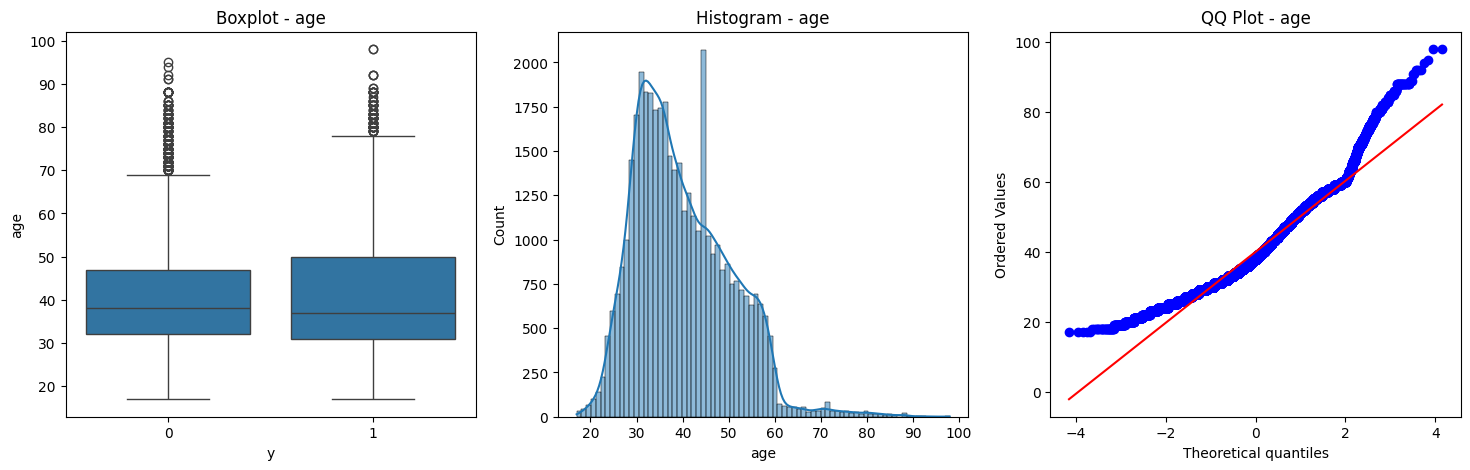

<Figure size 640x480 with 0 Axes>

In [25]:
col = 'age'

display(df_check.loc[df_check["Row"] == col])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data = df, x = 'y', y = col, ax=axes[0])
axes[0].set_title(f'Boxplot - {col}')

sns.histplot(df[col], bins=df[col].nunique(), kde=True, ax=axes[1])
axes[1].set_title(f'Histogram - {col}')

stats.probplot(df[col], dist="norm", plot=plt)
plt.title(f'QQ Plot - {col}')
plt.show()

plt.tight_layout()
plt.show()


Histogram menunjukkan bahwa distribusi usia **tidak simetris** dan **right-skewed**. Mayoritas data terkonsentrasi pada rentang usia sekitar 30–45 tahun, sementara ekor distribusi memanjang ke usia yang lebih tua (hingga >90 tahun).

Boxplot memperlihatkan **banyak outlier pada usia lanjut** di kedua kelas target (y=0 dan y=1). Namun median usia relatif mirip, yang artinya usia saja bukan pembeda kuat antara kedua kelas target

Pada QQ Plot menegaskan adanya heavy tail pada usia tinggi, diperlihatkan dengan titik-titik di ekor kanan berada jauh di atas garis teoritis

- Distribusi age tidak normal

#### Campaign

Row Tipe Data  N Unique  Jumlah Outlier    Skew Kurtosis Jarque-Bera  \
1  campaign  int64     42        2379            4.7780  37.1978  0.0          

            Anderson-Darling                      Contoh data  
1  Tail berat / outlier kuat  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

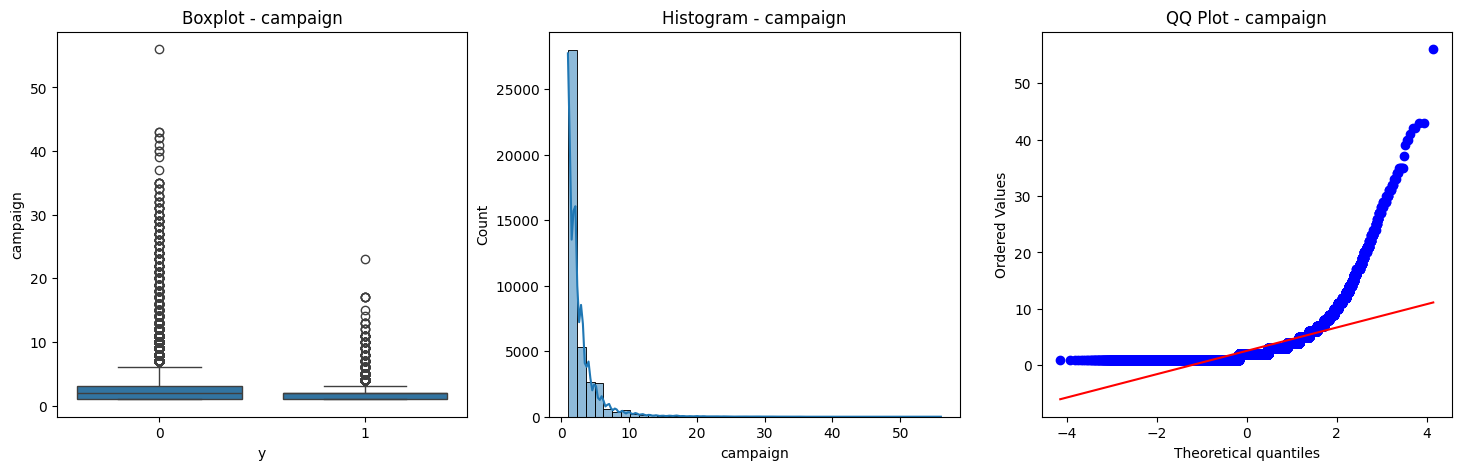

<Figure size 640x480 with 0 Axes>

In [26]:
col = 'campaign'

display(df_check.loc[df_check["Row"] == col])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data = df, x = 'y', y = col, ax=axes[0])
axes[0].set_title(f'Boxplot - {col}')

sns.histplot(df[col], bins=df[col].nunique(), kde=True, ax=axes[1])
axes[1].set_title(f'Histogram - {col}')

stats.probplot(df[col], dist="norm", plot=plt)
plt.title(f'QQ Plot - {col}')
plt.show()

plt.tight_layout()
plt.show()

Histogram menunjukkan bahwa nilai campaign sangat terkonsentrasi pada nilai rendah (1–3 kontak), sementara sebagian kecil observasi memiliki jumlah kontak yang sangat tinggi hingga >50. Ini mencerminkan **right-skew ekstrem**.

Terkonfirmasi pada QQ plot, nampak titik-titik pada kuantil atas menyimpang tajam dari garis normal, menandakan heavy tail yang kuat.

Boxplot memperlihatkan **jumlah outlier yang sangat besar**, khususnya pada kelas y = 0. Outlier ini merepresentasikan nasabah yang dihubungi berulang kali dalam satu campaign.

- Distribusi campaign tidak normal

#### Feature p_days

Row Tipe Data  N Unique  Jumlah Outlier    Skew Kurtosis Jarque-Bera  \
2  pdays  int64     26        1480            7.9515  76.5834  0.0          

            Anderson-Darling                      Contoh data  
2  Tail berat / outlier kuat  [0, 6, 4, 3, 5, 1, 10, 7, 8, 9]

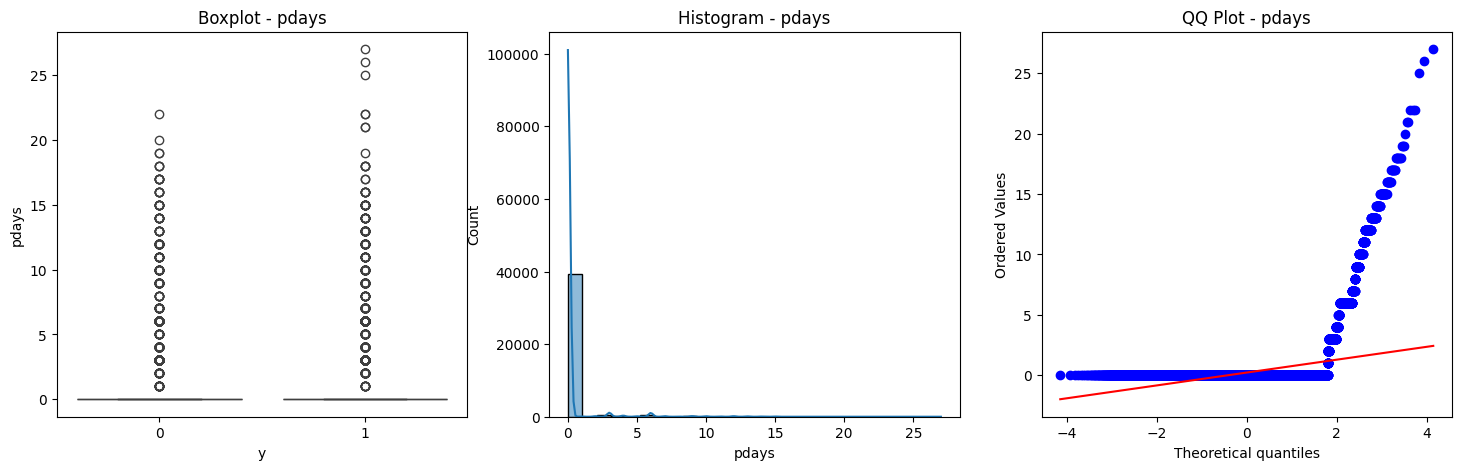

Distribusi pdays


<Figure size 640x480 with 0 Axes>

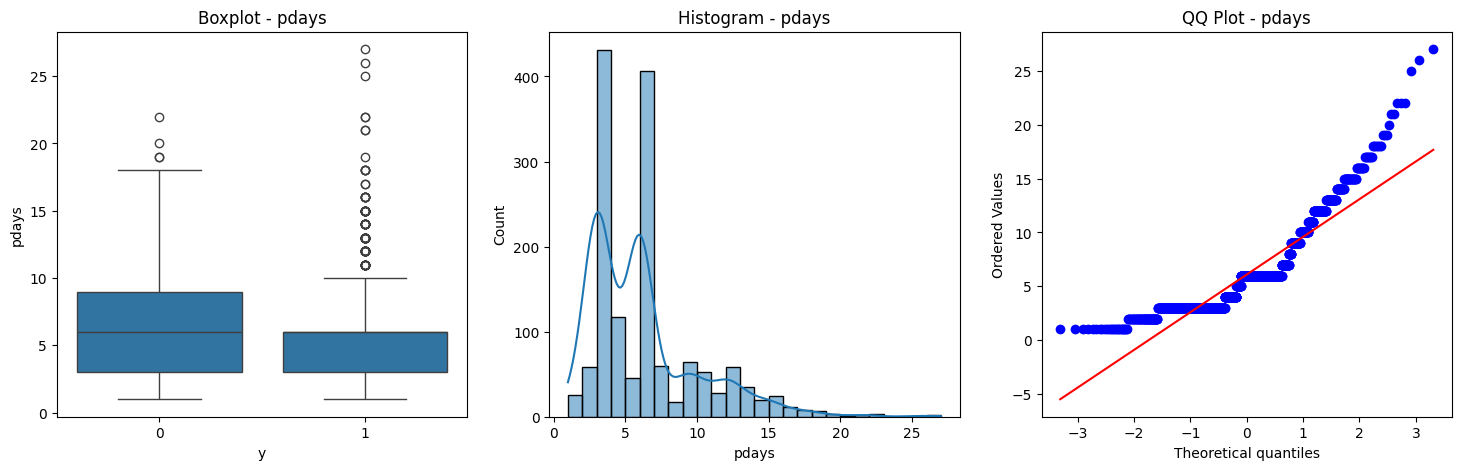

Distribusi pdays selain 0 (nasabah yang belum pernah dihubungi sebelumnya)


<Figure size 640x480 with 0 Axes>

In [27]:
# Distribusi pdays
col = 'pdays'

display(df_check.loc[df_check["Row"] == col])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data = df, x = 'y', y = col, ax=axes[0])
axes[0].set_title(f'Boxplot - {col}')

sns.histplot(df[col], bins=df[col].nunique(), kde=True, ax=axes[1])
axes[1].set_title(f'Histogram - {col}')

stats.probplot(df[col], dist="norm", plot=plt)
plt.title(f'QQ Plot - {col}')
plt.show()

plt.tight_layout()
print("Distribusi pdays")
plt.show()

# Distribusi pdays selain 0 (nasabah yang belum pernah dihubungi sebelumnya) 
df_pdays = df[df['pdays'] != 0]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data = df_pdays, x = 'y', y = col, ax=axes[0])
axes[0].set_title(f'Boxplot - {col}')

sns.histplot(df_pdays[col], bins=df[col].nunique(), kde=True, ax=axes[1])
axes[1].set_title(f'Histogram - {col}')

stats.probplot(df_pdays[col], dist="norm", plot=plt)
plt.title(f'QQ Plot - {col}')
plt.show()

plt.tight_layout()
print("Distribusi pdays selain 0 (nasabah yang belum pernah dihubungi sebelumnya)") 
plt.show()

Feature pdays merupakan feature numerik dengan makna khusus, di mana nilai nol merepresentasikan kondisi “belum pernah dihubungi” dan bukan bagian dari distribusi kontinu. Setelah nilai nol dikeluarkan, distribusi pdays tetap menunjukkan karakteristik **right-skewed** dan **heavy tail** dengan **banyak outlier ekstrem**. Visualisasi juga mengindikasikan bahwa jarak waktu kontak yang lebih pendek cenderung berkorelasi dengan keberhasilan konversi, sehingga pdays merupakan feature penting dengan implikasi bisnis dan prediktif yang signifikan.

- Distribusi pdays tidak normal

#### Feature Previous

Row Tipe Data  N Unique  Jumlah Outlier    Skew Kurtosis Jarque-Bera  \
3  previous  int64     8         5588            3.8342  20.1558  0.0          

            Anderson-Darling               Contoh data  
3  Tail berat / outlier kuat  [0, 1, 2, 3, 4, 5, 6, 7]

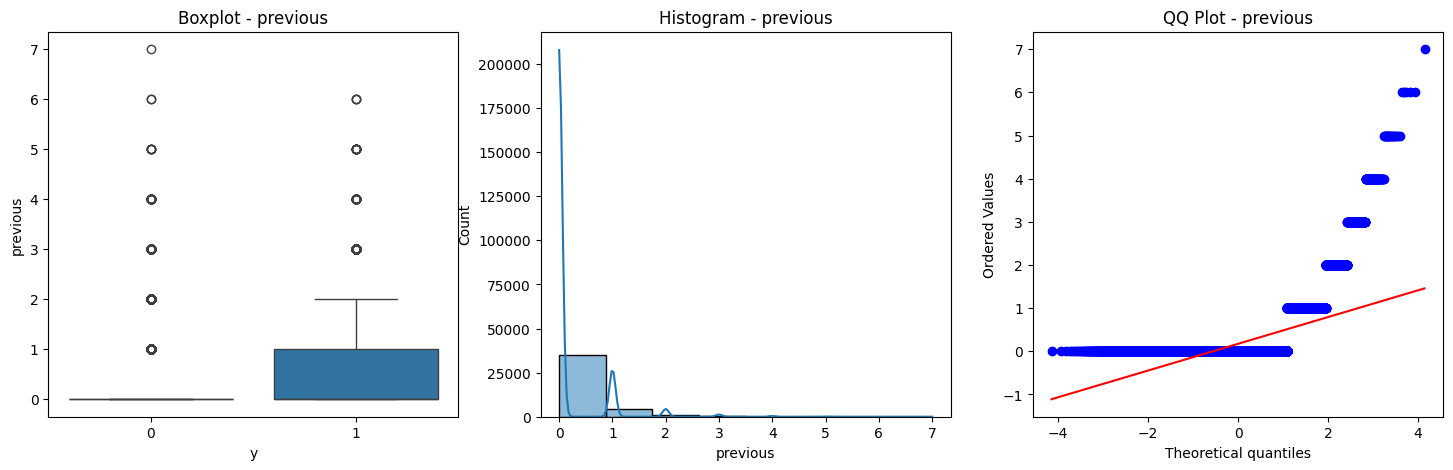

<Figure size 640x480 with 0 Axes>

In [28]:
col = 'previous'

display(df_check.loc[df_check["Row"] == col])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data = df, x = 'y', y = col, ax=axes[0])
axes[0].set_title(f'Boxplot - {col}')

sns.histplot(df[col], bins=df[col].nunique(), kde=True, ax=axes[1])
axes[1].set_title(f'Histogram - {col}')

stats.probplot(df[col], dist="norm", plot=plt)
plt.title(f'QQ Plot - {col}')
plt.show()

plt.tight_layout()
plt.show()

Histogram menunjukkan bahwa nilai previous sangat terkonsentrasi di angka 0, sementara sebagian kecil observasi memiliki nilai >0 hingga sekitar 7. Ini menunjukkan mayoritas nasabah belum pernah dihubungi pada campaign sebelumnya

Distribusinya sangat **tidak normal** dan **right-skewed**, namun menunjukkan perbedaan yang jelas antar kelas target, di mana nasabah dengan riwayat kontak sebelumnya cenderung memiliki peluang konversi yang lebih tinggi. Oleh karena itu, previous memiliki nilai prediktif yang signifikan jika diolah dengan pendekatan yang tepat.

- Distribusi previous tidak normal

#### Feature cons.price.idx

Row Tipe Data  N Unique  Jumlah Outlier     Skew Kurtosis  \
4  cons.price.idx  float64   26        0               -0.2263  -0.8326   

             Jarque-Bera           Anderson-Darling  \
4  3.893125448286612e-43  Tail berat / outlier kuat   

                                                                      Contoh data  
4  [93.994, 94.465, 93.918, 93.444, 93.798, 93.2, 92.756, 92.843, 93.075, 92.893]

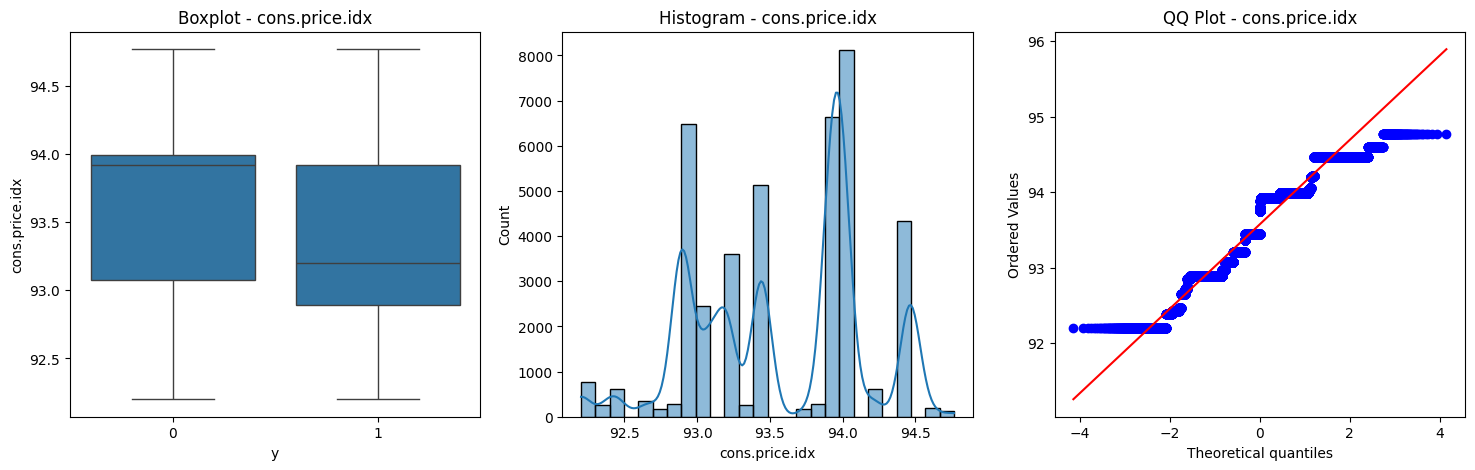

<Figure size 640x480 with 0 Axes>

In [29]:
col = 'cons.price.idx'

display(df_check.loc[df_check['Row'] == col])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data = df, x = 'y', y = col, ax=axes[0])
axes[0].set_title(f'Boxplot - {col}')

sns.histplot(df[col], bins=df[col].nunique(), kde=True, ax=axes[1])
axes[1].set_title(f'Histogram - {col}')

stats.probplot(df[col], dist='norm', plot=plt)
plt.title(f'QQ Plot - {col}')
plt.show()

plt.tight_layout()
plt.show()

Histogram dan boxplot menunjukkan bahwa nilai cons.price.idx berada dalam rentang yang sempit dan tidak menampilkan outlier ekstrim.

Nilai skewness yang mendekati nol menunjukkan distribusi yang relatif simetris. QQ plot memperlihatkan bahwa sebagian besar titik berada dekat dengan garis normal, meskipun terdapat deviasi ringan pada bagian ekor.

Boxplot berdasarkan target (y) menunjukkan perbedaan median yang relatif kecil antara y = 0 dan y = 1. Ini mengindikasikan bahwa cons.price.idx bukan pembeda kuat secara individual,

- Feature cons.price.idx memiliki distribusi relatif stabil, meski secara statistik tidak normal sepenuhnya 

#### Feature cons.conf.idx

Row Tipe Data  N Unique  Jumlah Outlier    Skew Kurtosis  \
5  cons.conf.idx  float64   26        440             0.3056  -0.3599   

            Jarque-Bera           Anderson-Darling  \
5  2.18046048194312e-21  Tail berat / outlier kuat   

                                                              Contoh data  
5  [-36.4, -41.8, -42.7, -36.1, -40.4, -42.0, -45.9, -50.0, -47.1, -46.2]

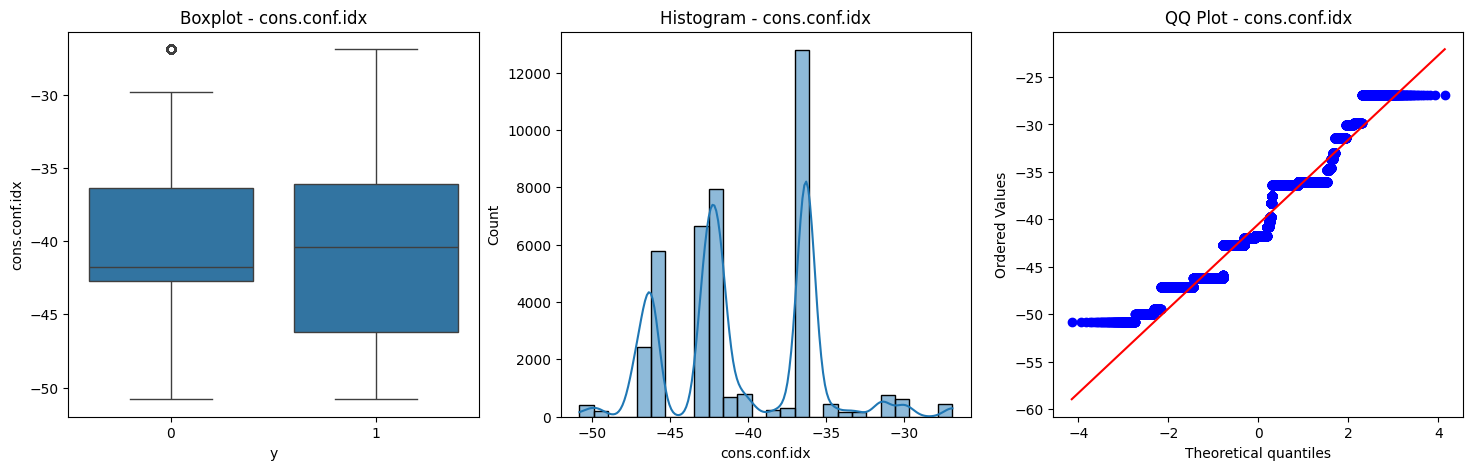

<Figure size 640x480 with 0 Axes>

In [30]:
col = 'cons.conf.idx'

display(df_check.loc[df_check["Row"] == col])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data = df, x = 'y', y = col, ax=axes[0])
axes[0].set_title(f'Boxplot - {col}')

sns.histplot(df[col], bins=df[col].nunique(), kde=True, ax=axes[1])
axes[1].set_title(f'Histogram - {col}')

stats.probplot(df[col], dist="norm", plot=plt)
plt.title(f'QQ Plot - {col}')
plt.show()

plt.tight_layout()
plt.show()

Secara visual, distribusi cons.conf.idx terlihat cukup stabil dan tidak menunjukkan skew ekstrem. 

Pada QQ plot memperlihatkan deviasi pada bagian ekor distribusi. Ini menunjukkan bahwa meskipun tampak stabil, distribusi tidak sepenuhnya normal secara statistik.

Boxplot menunjukkan adanya sejumlah outlier, namun berada dalam rentang yang masih masuk akal secara ekonomi.

- Feature cons.conf.idx menunjukkan distribusi relatif stabil dan mendekati simetris, namun tidak sepenuhnya normal secara statistik

#### Feature euribor3m

Row Tipe Data  N Unique  Jumlah Outlier     Skew Kurtosis  \
6  euribor3m  float64   316       0               -0.7058  -1.4113   

              Jarque-Bera           Anderson-Darling  \
6  8.230007119541281e-184  Tail berat / outlier kuat   

                                                             Contoh data  
6  [4.857, 4.856, 4.855, 4.859, 4.86, 4.858, 4.864, 4.865, 4.866, 4.967]

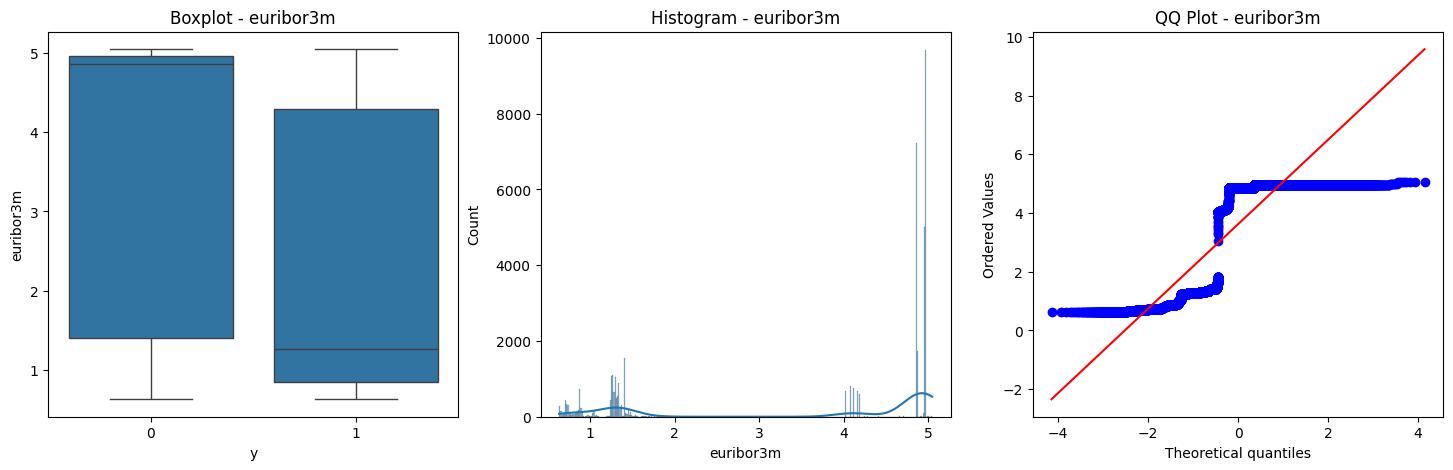

<Figure size 640x480 with 0 Axes>

In [31]:
col = 'euribor3m'

display(df_check.loc[df_check["Row"] == col])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data = df, x = 'y', y = col, ax=axes[0])
axes[0].set_title(f'Boxplot - {col}')

sns.histplot(df[col], bins=df[col].nunique(), kde=True, ax=axes[1])
axes[1].set_title(f'Histogram - {col}')

stats.probplot(df[col], dist="norm", plot=plt)
plt.title(f'QQ Plot - {col}')
plt.show()

plt.tight_layout()
plt.show()

Histogram menunjukkan distribusi ini **tidak simetris** dan tidak mengikuti pola normal, yang juga ditegaskan oleh QQ plot dengan deviasi signifikan dari garis normal terutama pada bagian tengah dan ekor distribusi.

Sebagian besar nilai euribor3m terkonsentrasi pada level tinggi, sementara nilai rendah relatif lebih jarang, menghasilkan skewness negatif.

Boxplot menunjukkan bahwa pada y=0, median dan sebaran euribor3m cenderung lebih tinggi. Sedangkan pada y=1, nilai euribor3m lebih rendah dan lebih terkonsentrasi. Hal ini mengindikasikan hubungan negatif antara tingkat suku bunga dan keberhasilan konversi, di mana lingkungan suku bunga rendah berkorelasi dengan peluang konversi yang lebih tinggi.

#### **Scatterplot**

Fungsi scatterplot adalah untuk menganalisis hubungan antara dua variabel numerik secara visual, sebelum menarik kesimpulan statistik atau membangun model.

In [59]:
XColNum = list(
    df.drop(columns=['y'])
    .select_dtypes(include=['number'])
    .columns)  # y tidak ikut

In [60]:
ColNum = XColNum.copy()
ColNum

['age',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

#### Korelasi Age dengan semua

age - 78
previous - 8


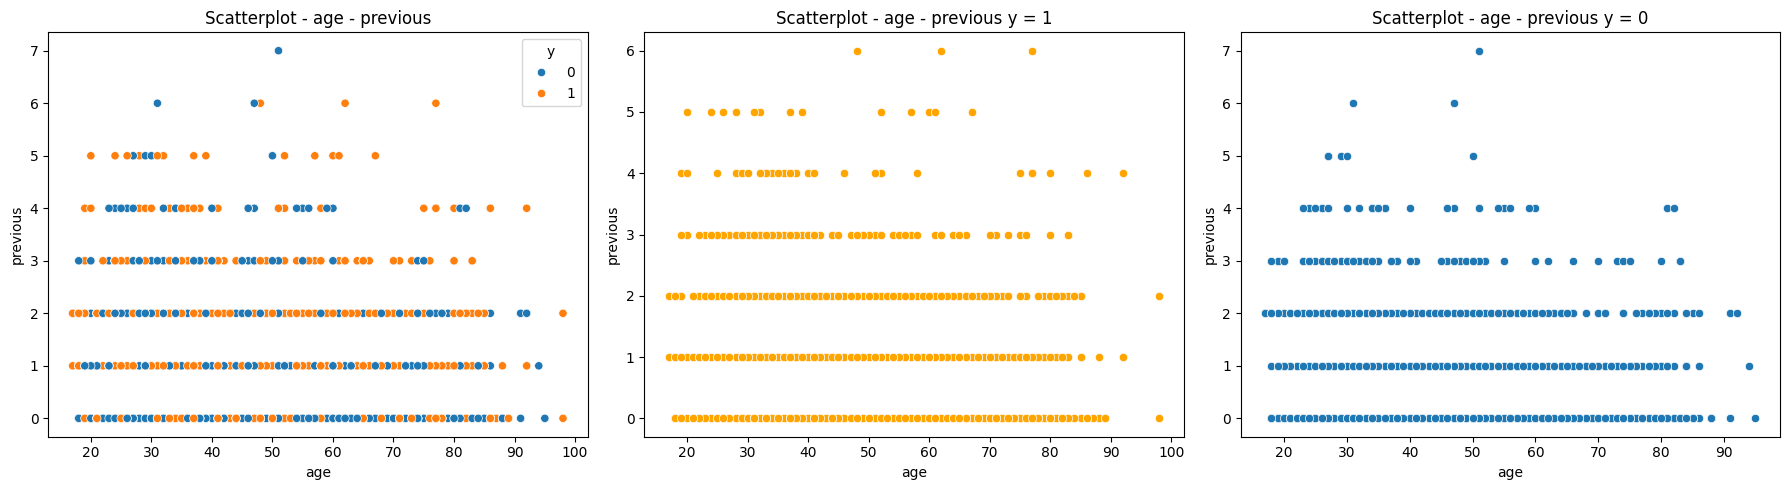

age - 78
cons.price.idx - 26


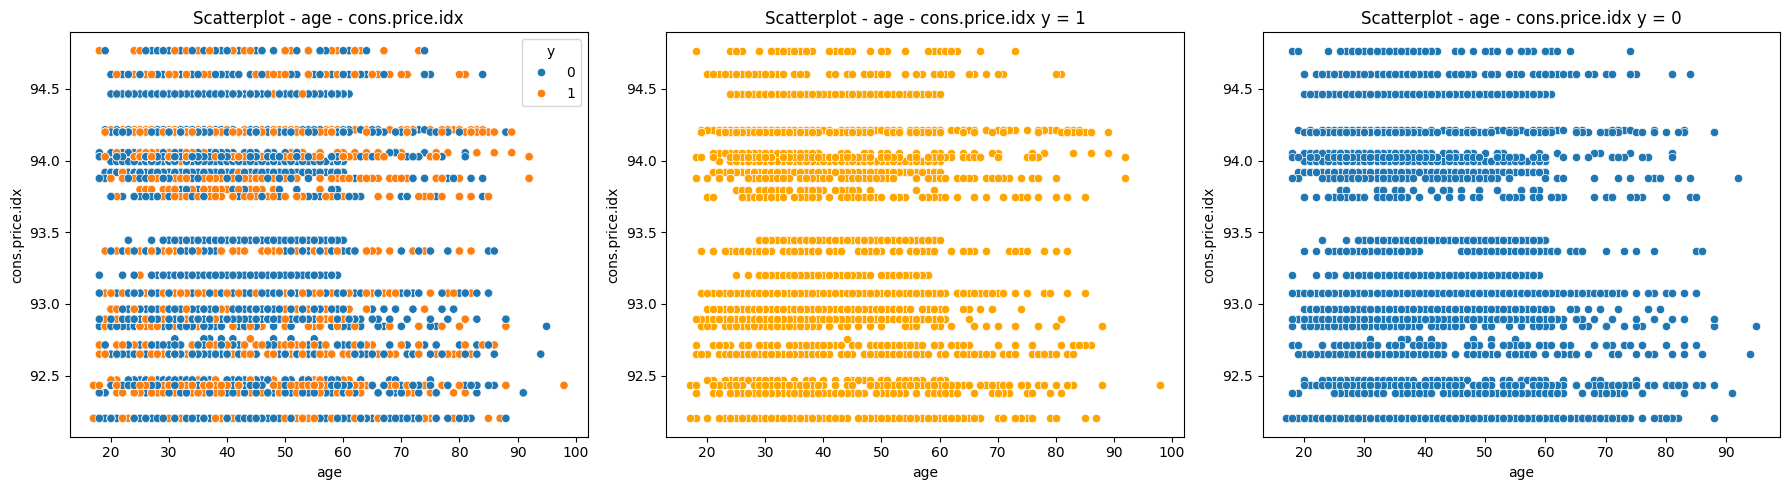

age - 78
cons.conf.idx - 26


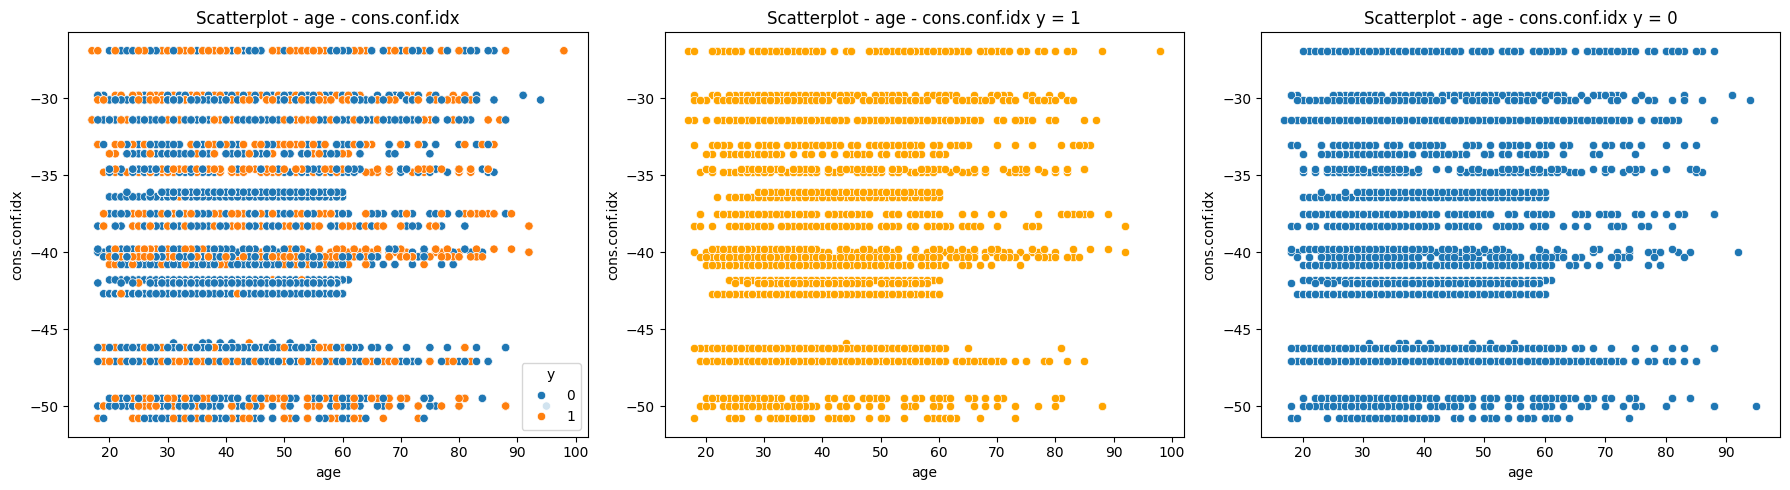

In [61]:
col = ColNum.pop(0)
for col2 in ColNum:
    if col2 in ['campaign', 'pdays', 'euribor3m'] : continue
    print(f'{col} - {df[col].nunique()}')
    print(f'{col2} - {df[col2].nunique()}')

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
    axes[0].set_title(f'Scatterplot - {col} - {col2}')

    sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
    axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

    sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
    plt.title(f'Scatterplot - {col} - {col2} y = 0')

    plt.tight_layout()
    plt.show()

Berdasarkan grafik di atas, dapat diambil kesimpulan sebagai berikut:
- Scatterplot age dan previous terlihat seperti garis sejajar dikarenakan previous memiliki nunique 8 dan data tidak memiliki korelasi linear
- Scatterplot lain tidak memiliki perbedaan yang signifikan atau tidak terlihat adanya korelasi

age - 78
campaign - 42


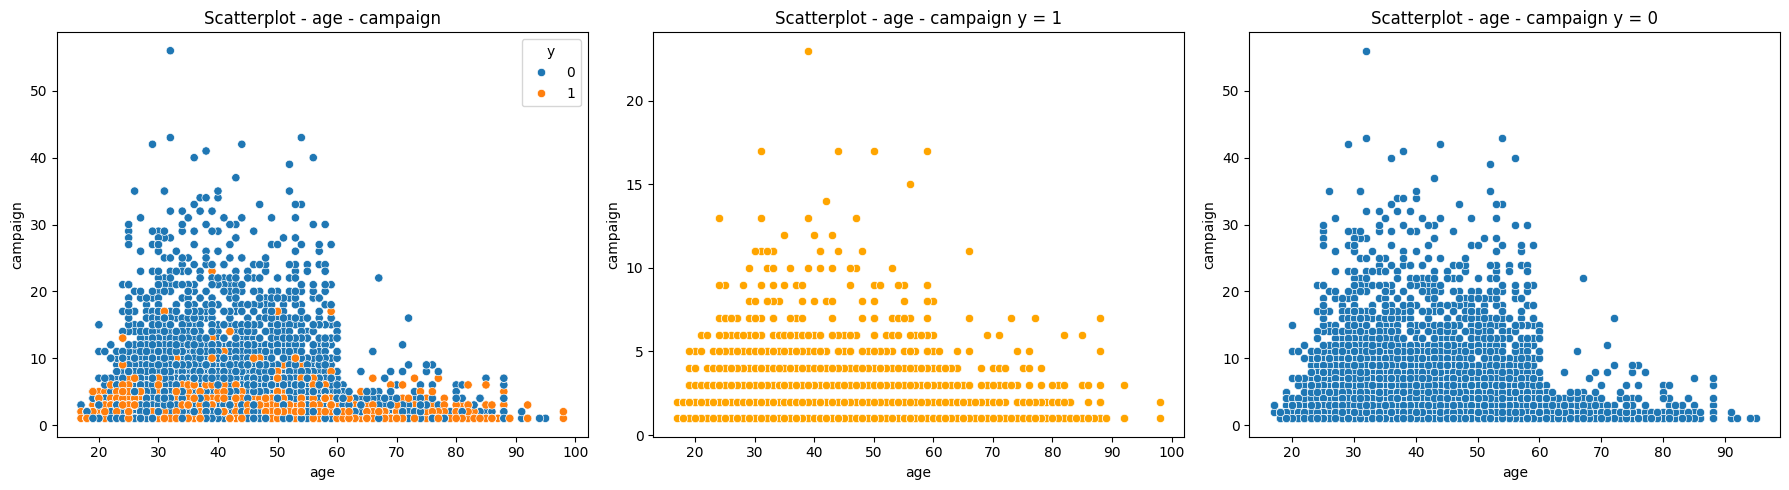

In [62]:
# Scatter age vs campaign
col = 'age'
col2 = 'campaign'
print(f'{col} - {df[col].nunique()}')
print(f'{col2} - {df[col2].nunique()}')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
axes[0].set_title(f'Scatterplot - {col} - {col2}')

sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
plt.title(f'Scatterplot - {col} - {col2} y = 0')

plt.tight_layout()
plt.show()

- Scatterplot age dan previous terlihat seperti garis sejajar dikarenakan previous memiliki nunique 8 dan data tidak memiliki korelasi linear
- Scatterplot lain tidak memiliki perbedaan yang signifikan atau tidak terlihat adanya korelasi

age - 78
pdays - 26


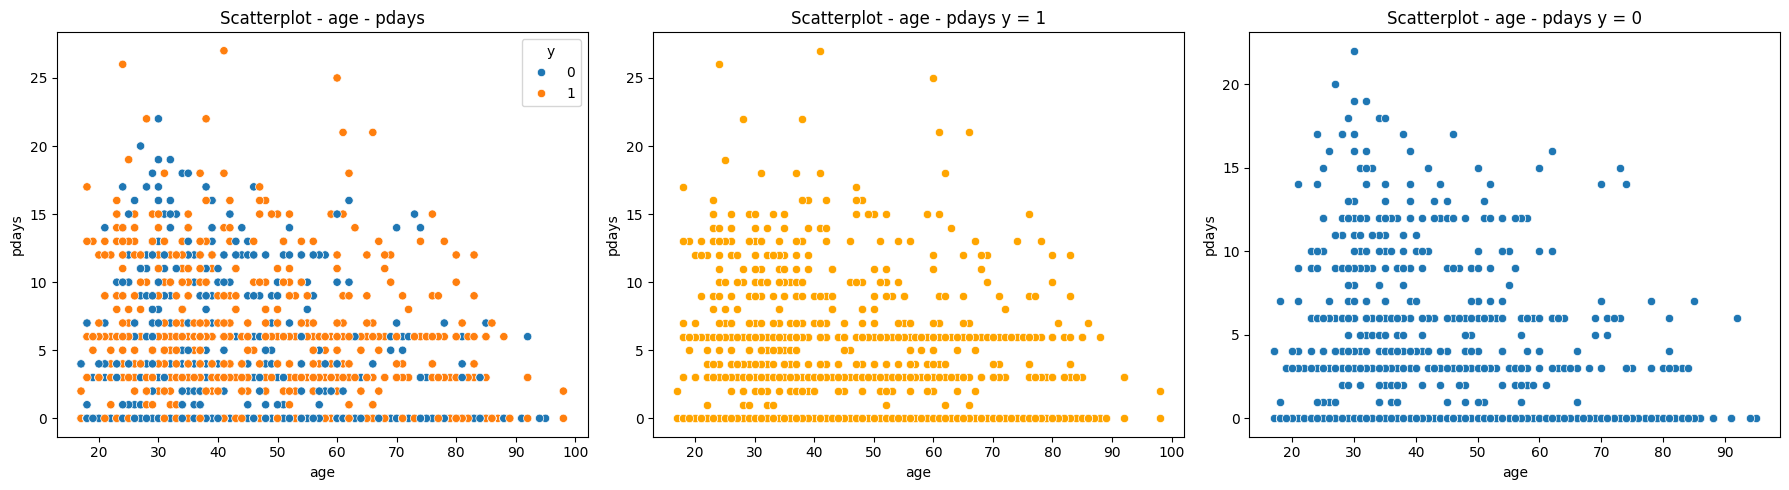

In [63]:
# scatterplot age vs pdays
col = 'age'
col2 = 'pdays'
print(f'{col} - {df[col].nunique()}')
print(f'{col2} - {df[col2].nunique()}')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
axes[0].set_title(f'Scatterplot - {col} - {col2}')

sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
plt.title(f'Scatterplot - {col} - {col2} y = 0')

plt.tight_layout()
plt.show()

Scatterplot feature Age dan pdays memiliki pola non-linear dimana semakin bertambah usia, nilai pdays semakin kecil ketika umur bertambah

age - 78
euribor3m - 316


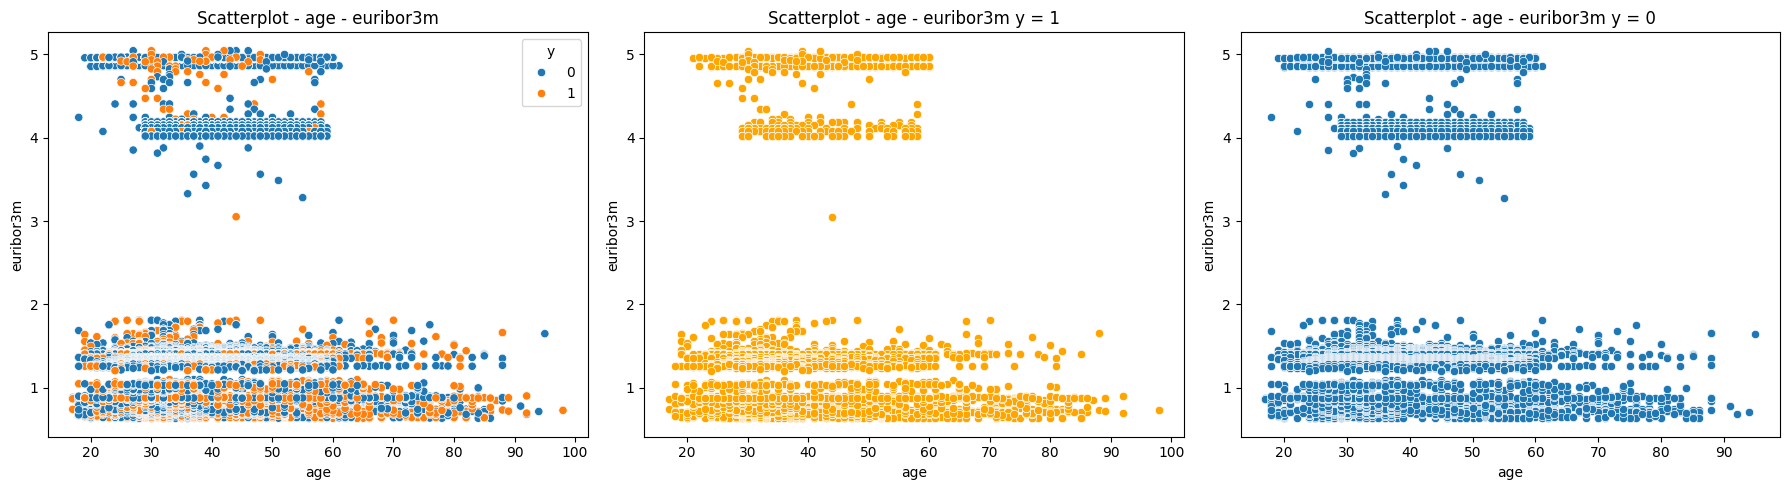

In [64]:
# Scatter age vs euribor3m
col = 'age'
col2 = 'euribor3m'
def scat(col, col2):
    print(f'{col} - {df[col].nunique()}')
    print(f'{col2} - {df[col2].nunique()}')

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
    axes[0].set_title(f'Scatterplot - {col} - {col2}')

    sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
    axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

    sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
    plt.title(f'Scatterplot - {col} - {col2} y = 0')

    plt.tight_layout()
    plt.show()
scat(col, col2)

Scatterplot menunjukkan bahwa variabel **euribor3m memiliki pengaruh yang jauh lebih kuat terhadap outcome subscribe dibanding usia nasabah**. Pelanggan dari berbagai kelompok usia menunjukkan kecenderungan serupa terhadap keputusan berlangganan, sementara perubahan tingkat suku bunga menciptakan perbedaan perilaku yang signifikan. Hal ini mengindikasikan bahwa faktor makroekonomi lebih menentukan keberhasilan campaign dibanding karakteristik demografis individu seperti usia.

#### Campaign

campaign - 42
cons.conf.idx - 26


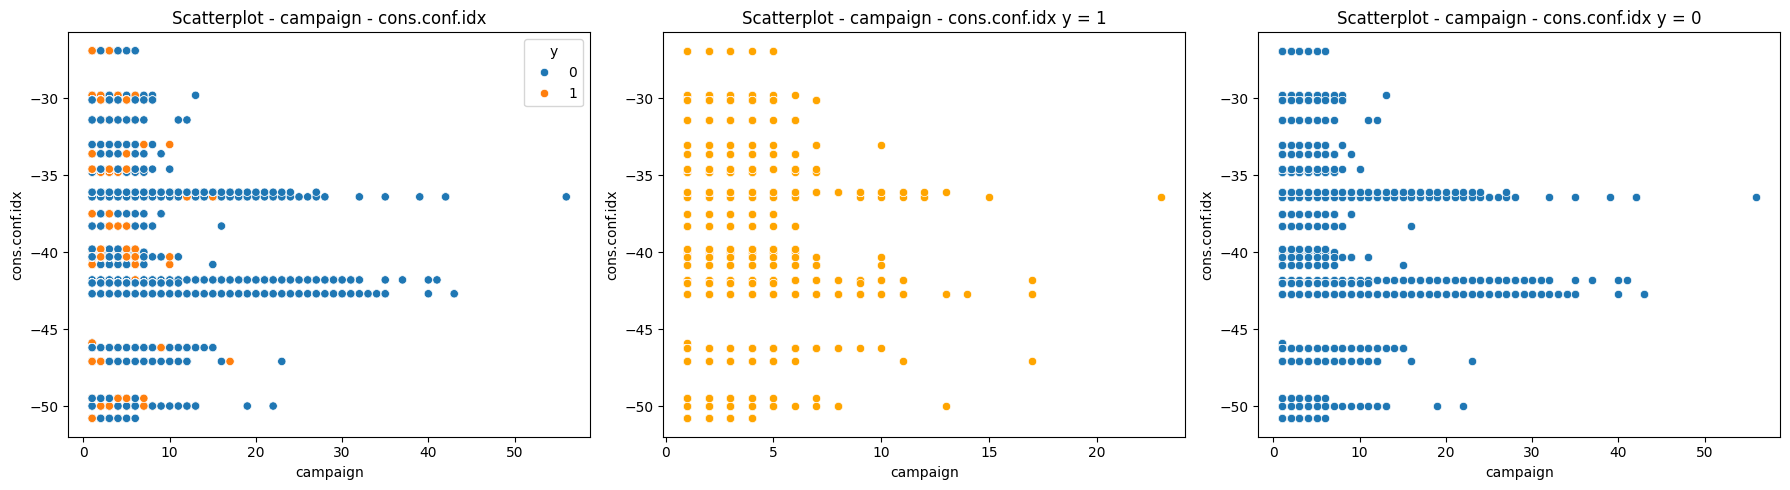

In [65]:
col = ColNum.pop(0)
for col2 in ColNum:
    if col2 == 'cons.conf.idx':
        print(f'{col} - {df[col].nunique()}')
        print(f'{col2} - {df[col2].nunique()}')

        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
        axes[0].set_title(f'Scatterplot - {col} - {col2}')

        sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
        axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

        sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
        plt.title(f'Scatterplot - {col} - {col2} y = 0')

        plt.tight_layout()
        plt.show()

campaign - 42
pdays - 26


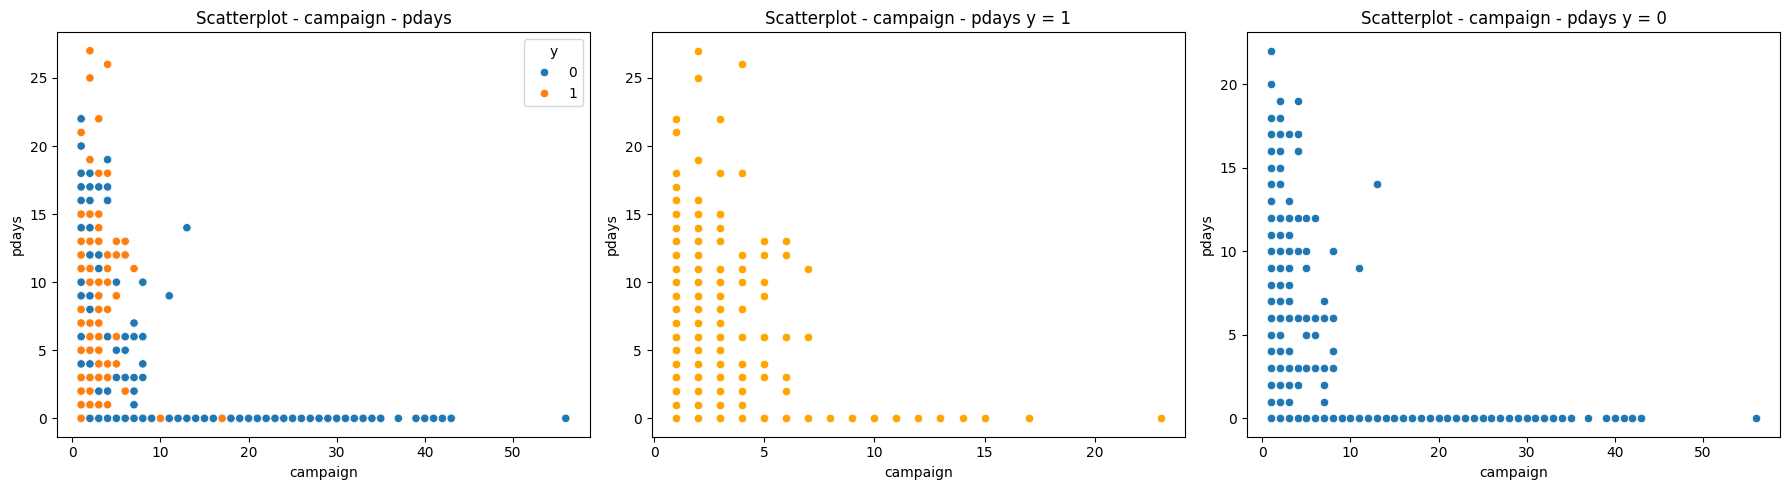

In [66]:
scat('campaign', 'pdays')

Campaign memiliki hubungan nonlinear dengan pdays dan mayoritas data campaign bernilai < 10

campaign - 42
previous - 8


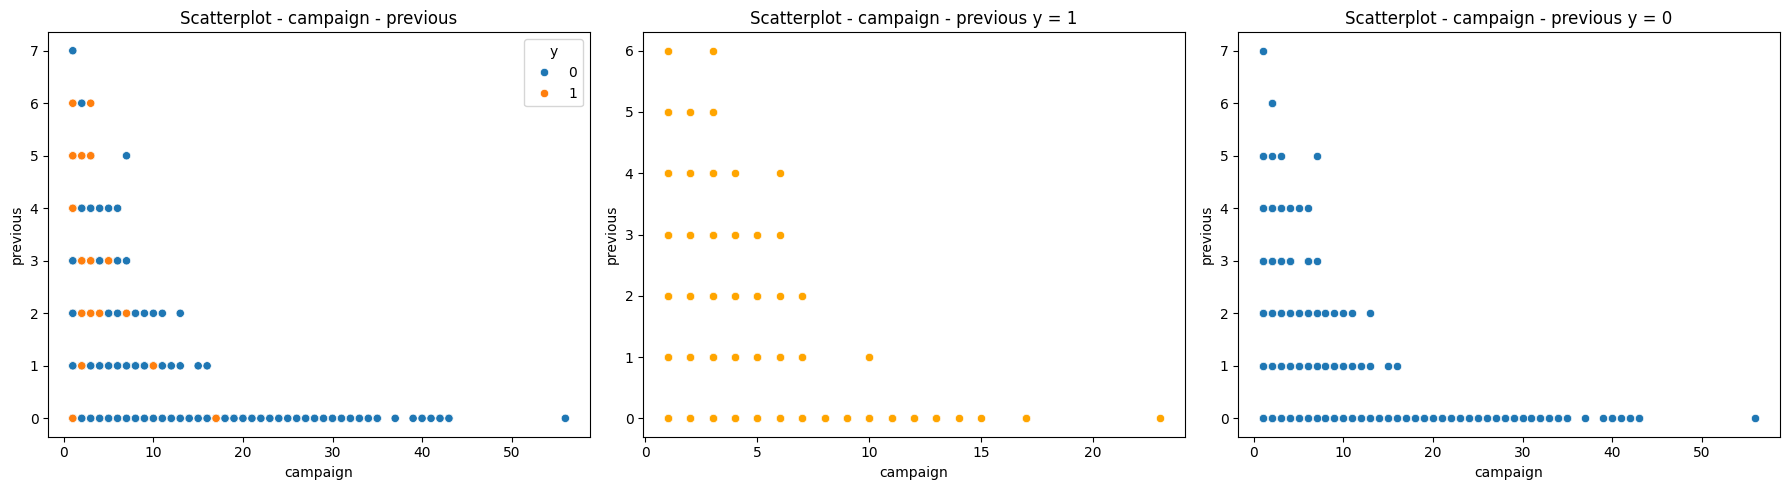

In [67]:
scat('campaign', 'previous')

Campaign memiliki hubungan nonlinear dengan previous

campaign - 42
cons.price.idx - 26


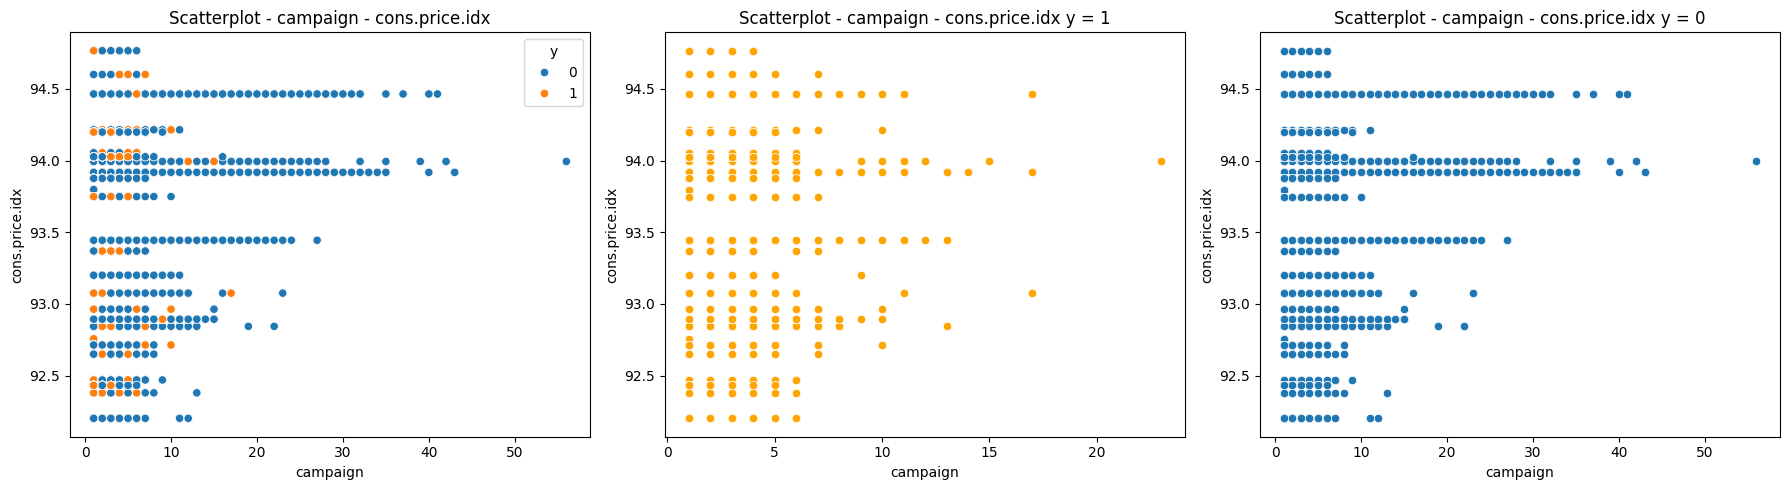

In [68]:
scat('campaign', 'cons.price.idx')

Campaign memiliki hubungan nonlinear dengan cons.price.idx

campaign - 42
euribor3m - 316


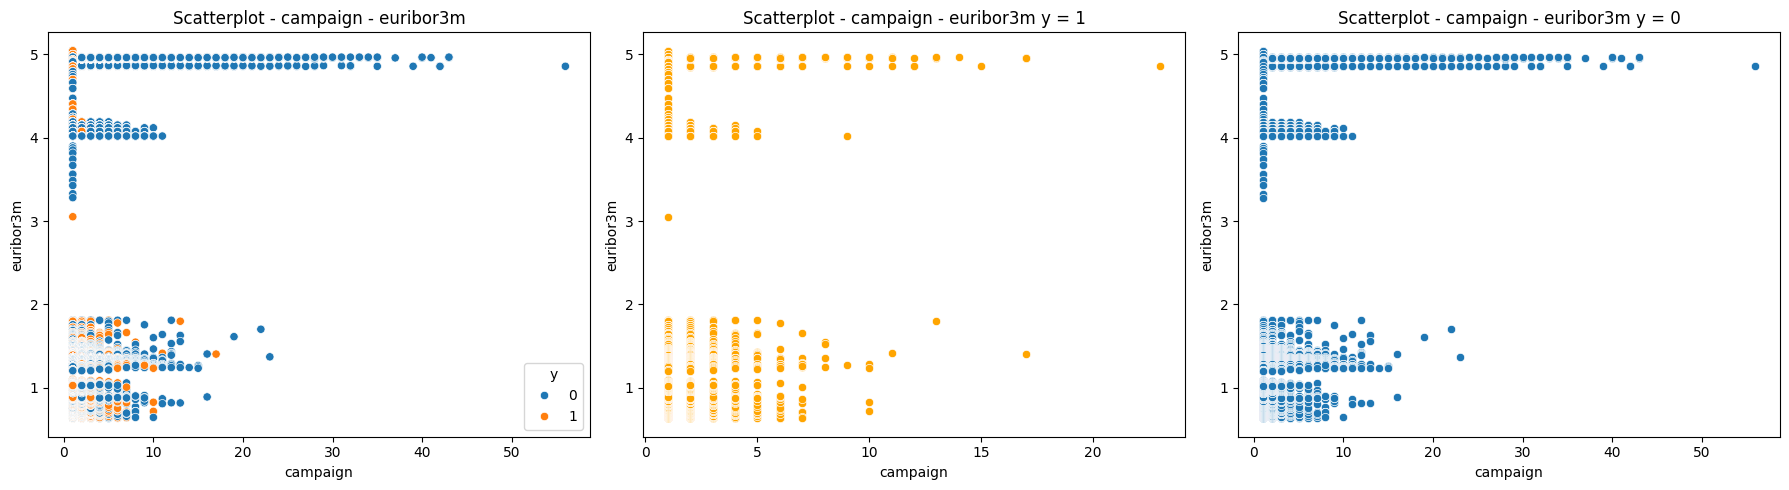

In [69]:
scat('campaign', 'euribor3m')

Scatterplot campaign dan euribor3m memiliki hubungan nonlinear positif dan memiliki data mayoritas tersebar rata jika campaign < 10

#### pdays

pdays - 26
previous - 8


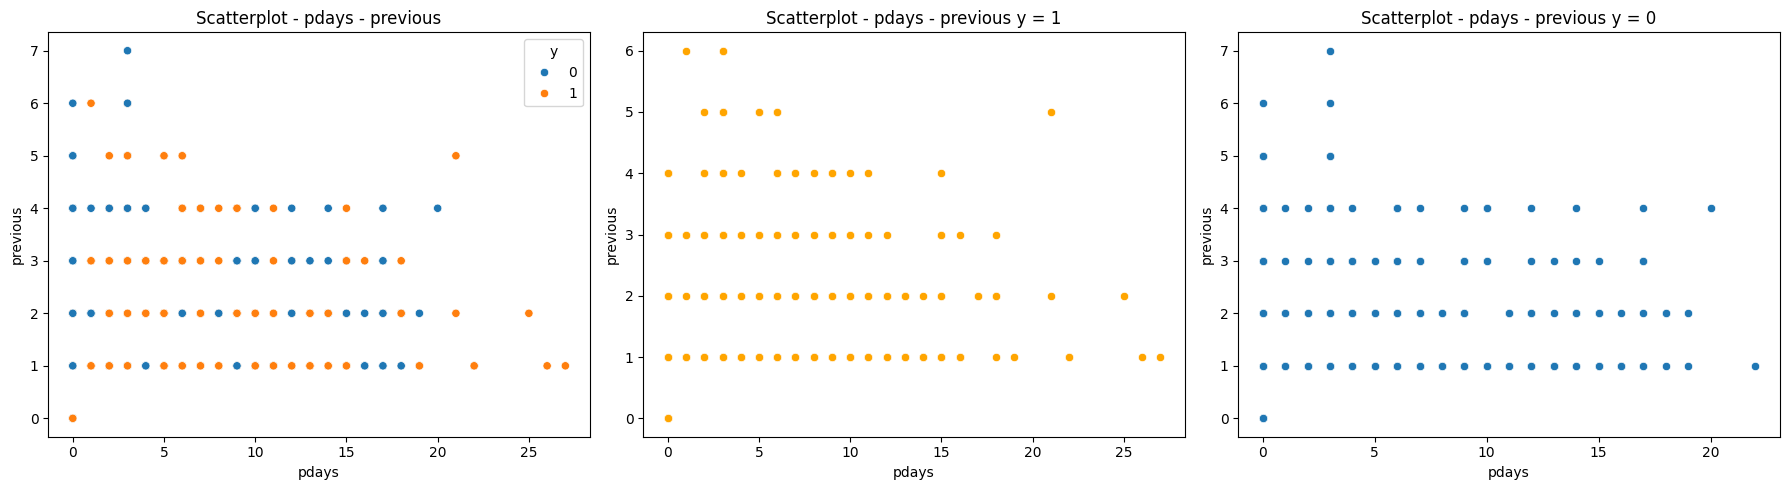

pdays - 26
cons.price.idx - 26


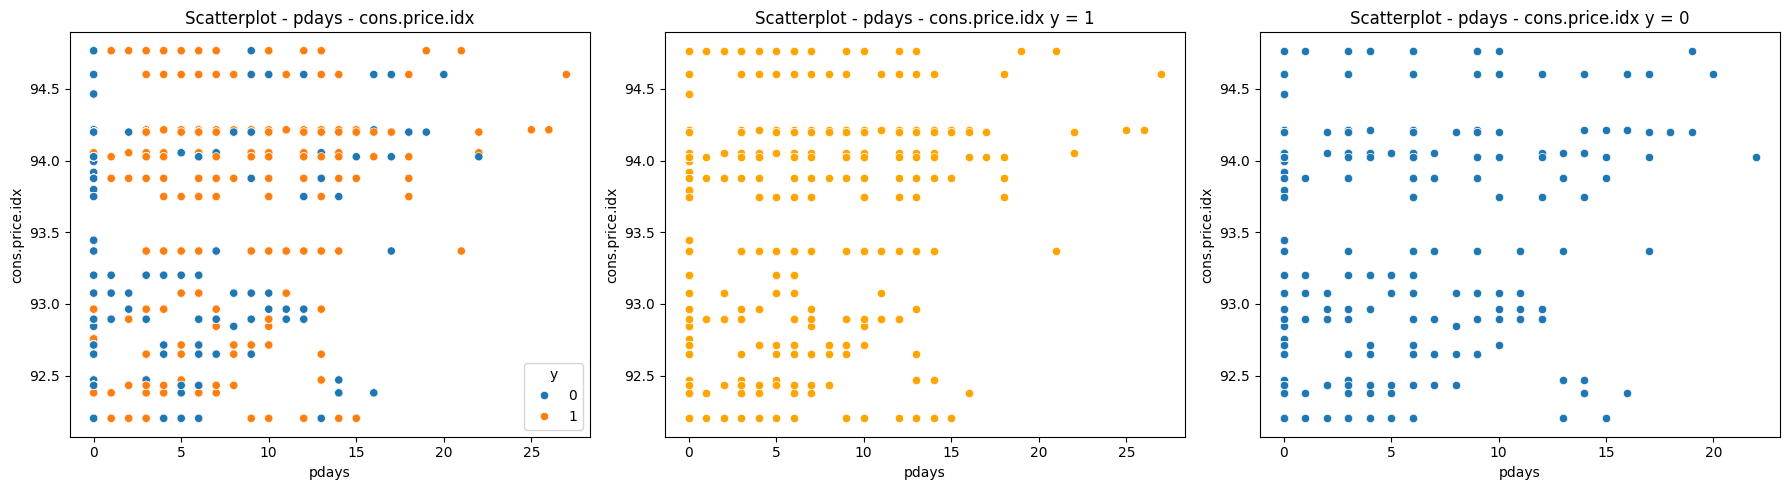

pdays - 26
cons.conf.idx - 26


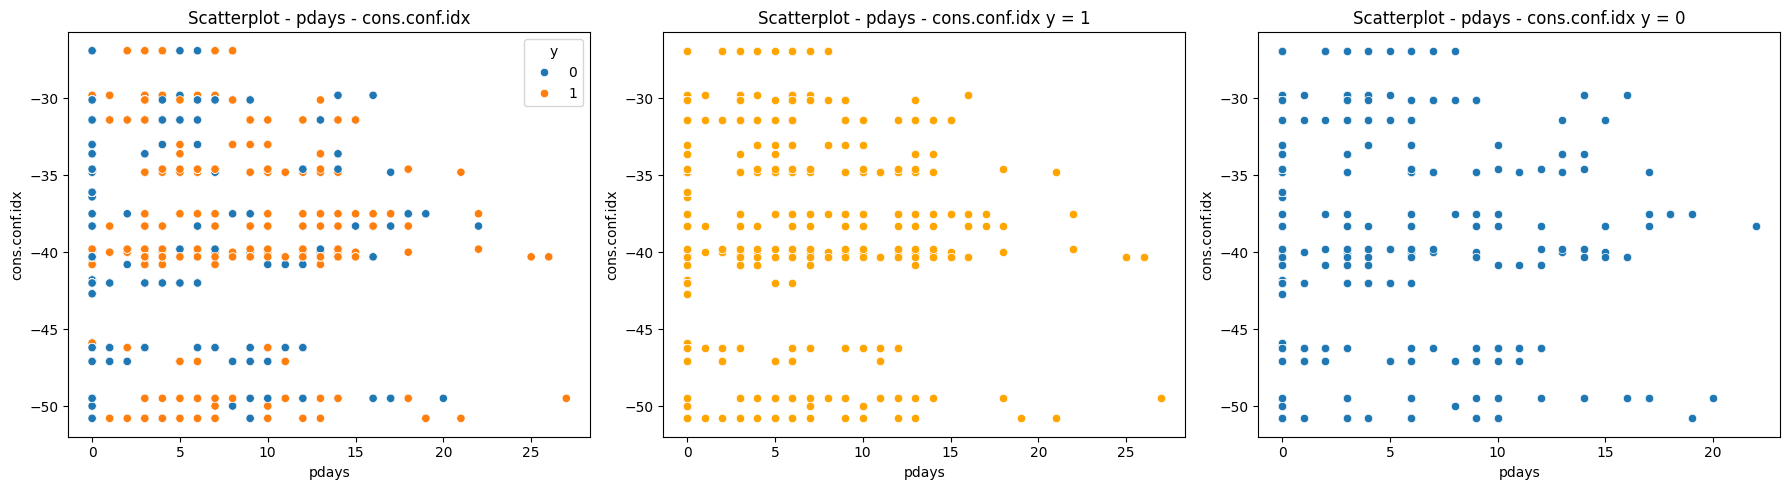

In [70]:
col = ColNum.pop(0)
for col2 in ColNum:
    if col2 == 'euribor3m': continue
    print(f'{col} - {df[col].nunique()}')
    print(f'{col2} - {df[col2].nunique()}')

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
    axes[0].set_title(f'Scatterplot - {col} - {col2}')

    sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
    axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

    sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
    plt.title(f'Scatterplot - {col} - {col2} y = 0')

    plt.tight_layout()
    plt.show()

Scatterplot pdays dengan previous, cons.price.idx, cons.conf.idx memiliki hubungan nonlinear tapi sangat kecil

pdays - 26
euribor3m - 316


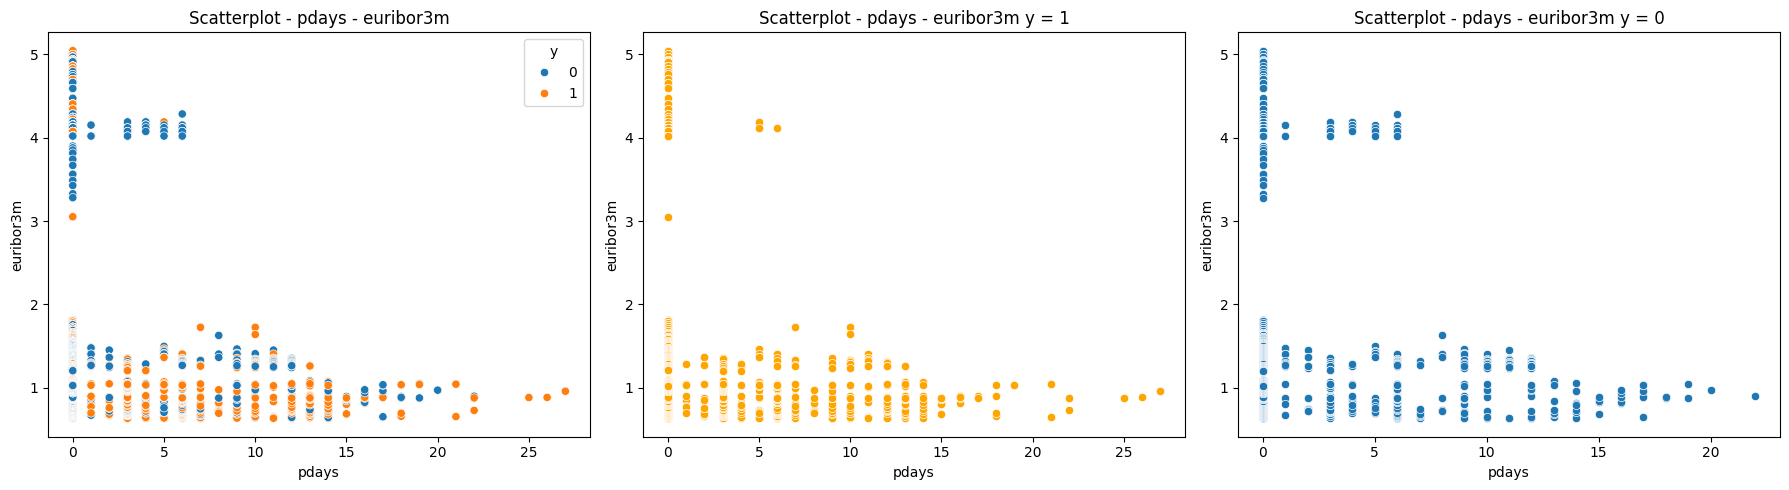

In [71]:
scat('pdays', 'euribor3m')

Scatterplot feature pdays euribor3m memiliki hubungan nonlinear positif

#### previous

previous - 8
cons.price.idx - 26


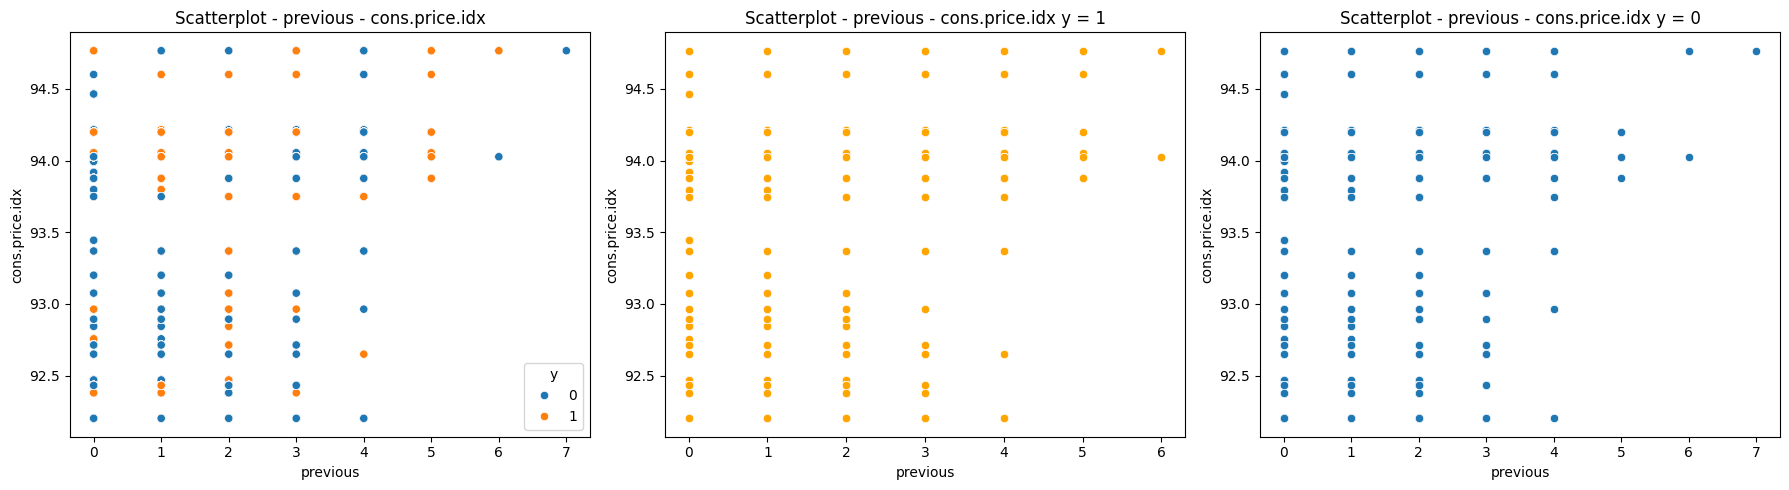

previous - 8
cons.conf.idx - 26


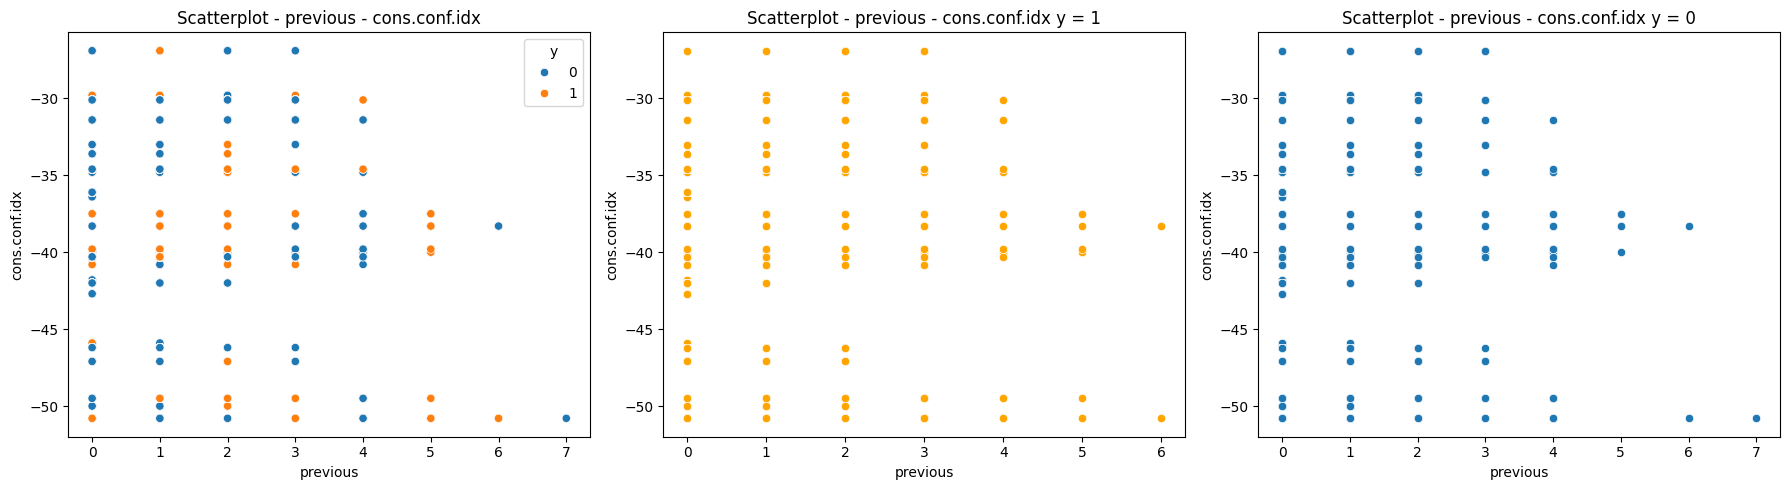

In [72]:
col = ColNum.pop(0)
for col2 in ColNum:
    if col2 == 'euribor3m' : continue
    print(f'{col} - {df[col].nunique()}')
    print(f'{col2} - {df[col2].nunique()}')

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
    axes[0].set_title(f'Scatterplot - {col} - {col2}')

    sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
    axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

    sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
    plt.title(f'Scatterplot - {col} - {col2} y = 0')

    plt.tight_layout()
    plt.show()

Scatterplot data previous dan cons.price.idx dan cons.conf.idx tidak atau sedikit memiliki korelasi

previous - 8
euribor3m - 316


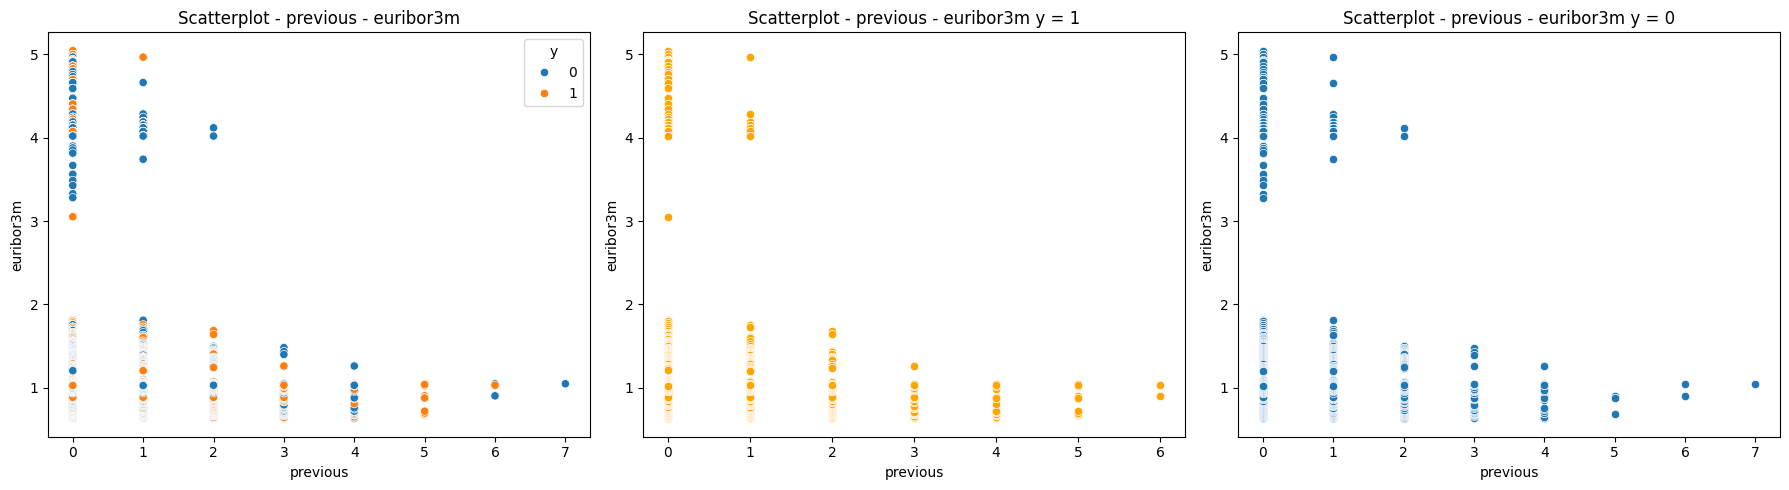

In [73]:
scat('previous', 'euribor3m')

Scatter plot previous dengan euribor3m memiliki hubungan nonlinear negatif yang sangat terlihat

#### cons.price.idx

cons.price.idx - 26
cons.conf.idx - 26


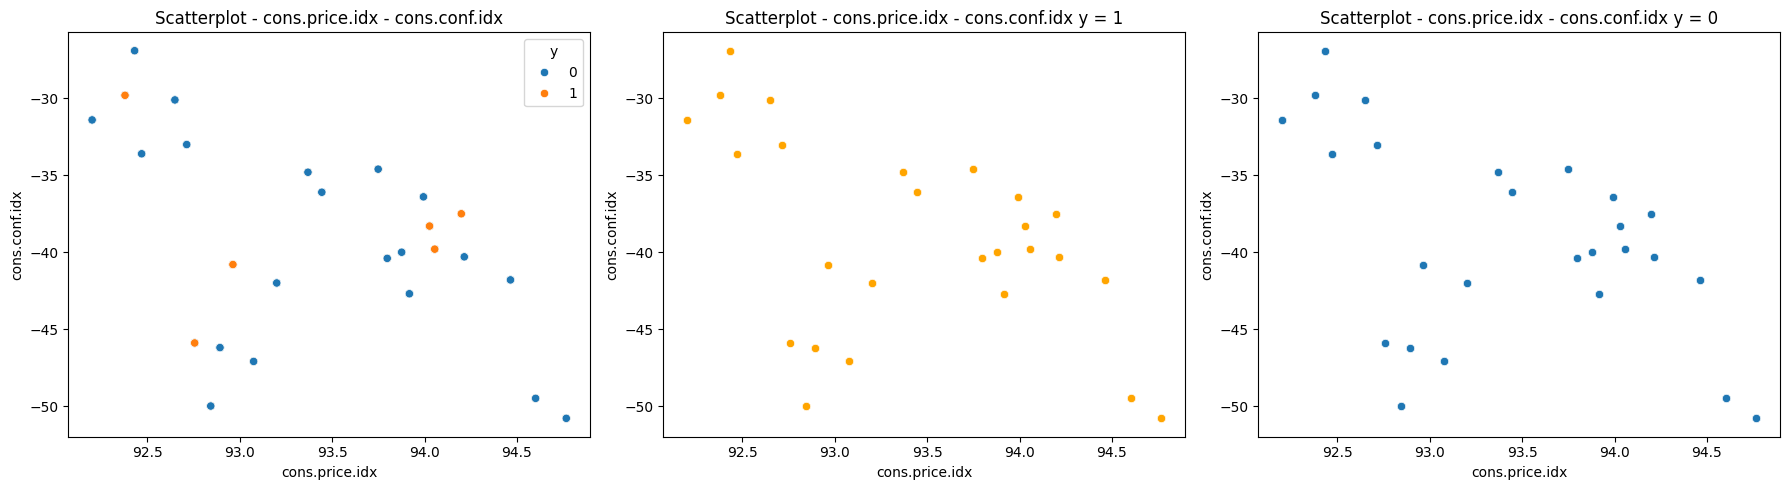

cons.price.idx - 26
euribor3m - 316


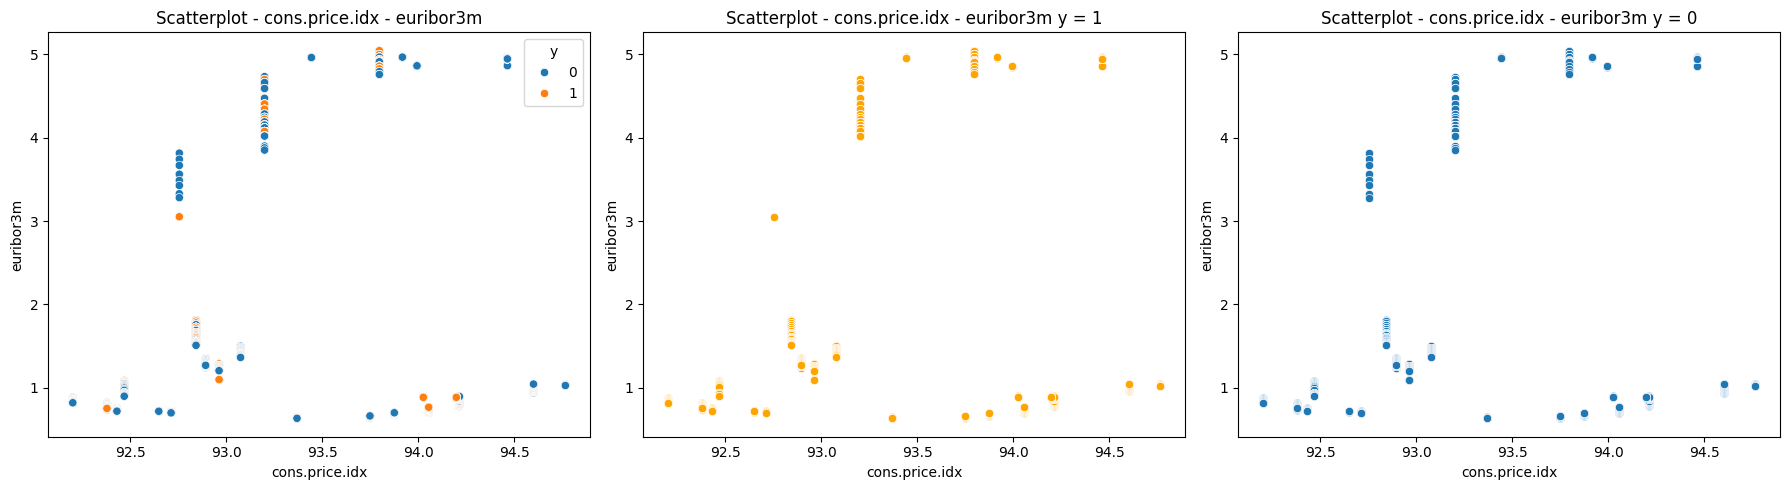

In [74]:
col = ColNum.pop(0)
for col2 in ColNum:

    print(f'{col} - {df[col].nunique()}')
    print(f'{col2} - {df[col2].nunique()}')

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
    axes[0].set_title(f'Scatterplot - {col} - {col2}')

    sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
    axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

    sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
    plt.title(f'Scatterplot - {col} - {col2} y = 0')

    plt.tight_layout()
    plt.show()

Scatterplot cons.price.idx dan cons.conf.idx dan euribor3m tidak atau sedikit memiliki korelasi

#### cons.conf.idx dengan euribor3m

cons.conf.idx - 26
euribor3m - 316


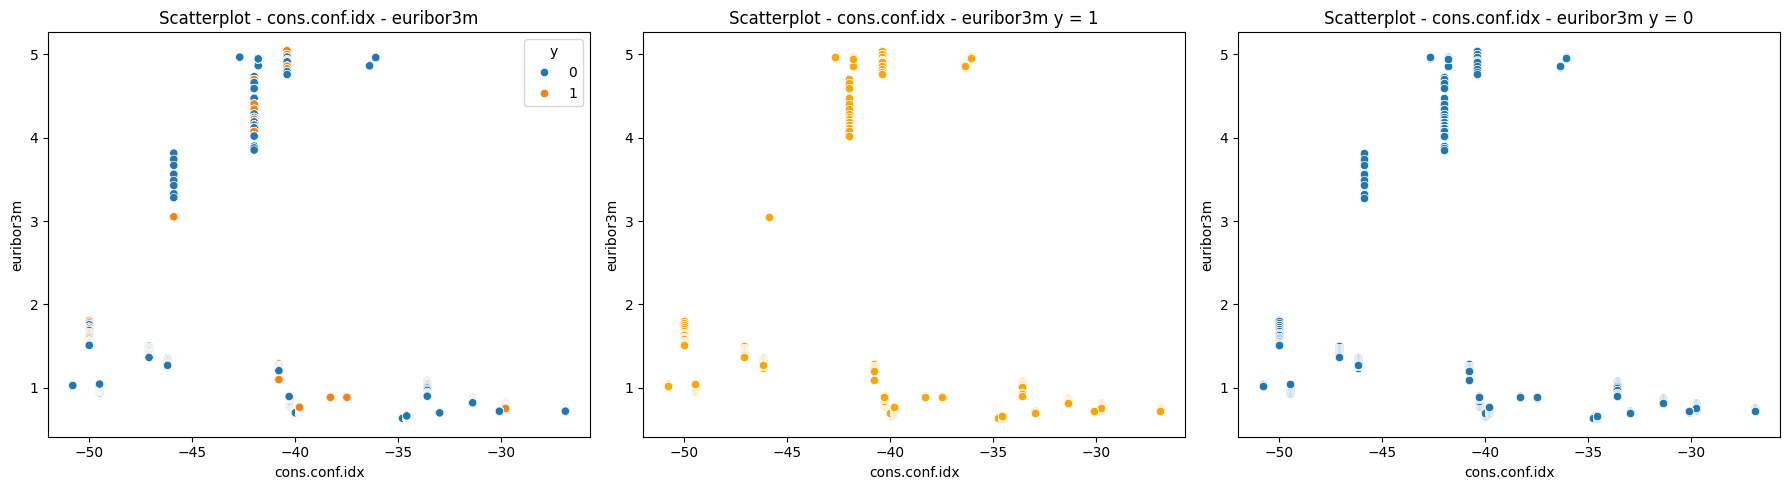

In [75]:
col = ColNum.pop(0)
for col2 in ColNum:

    print(f'{col} - {df[col].nunique()}')
    print(f'{col2} - {df[col2].nunique()}')

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    sns.scatterplot(data = df, x = col, y = col2, hue = 'y', ax=axes[0])
    axes[0].set_title(f'Scatterplot - {col} - {col2}')

    sns.scatterplot(data = df[df['y'] == 1], x = col, y = col2, color = 'orange', ax=axes[1])
    axes[1].set_title(f'Scatterplot - {col} - {col2} y = 1')

    sns.scatterplot(data = df[df['y'] == 0], x = col, y = col2, ax=axes[2])
    plt.title(f'Scatterplot - {col} - {col2} y = 0')

    plt.tight_layout()
    plt.show()

Scatterplot cons.conf.idx dan euribor3m tidak atau sedikit memiliki korelasi

Insight semua:
- Tidak ada pola linear di setiap scatterplot dikarenakan semua data terdistribusi tidak normal

#### **Korelasi Spearman**

Penggunaan Korelasi metode Spearman dikarenakan semua feature number data memiliki distribusi tidak normal.

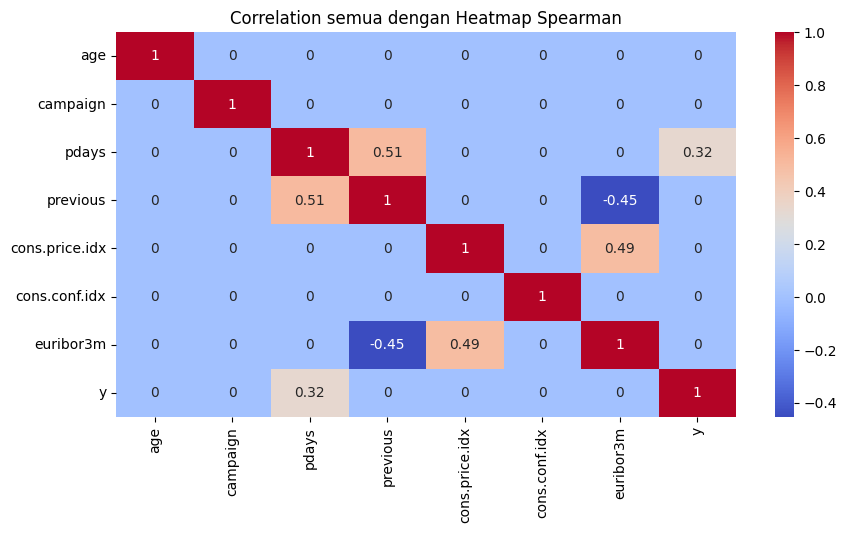

In [76]:
# Check korelasi semua feature dengan Spearman
plt.figure(figsize=(10,5))

df_corr = df.select_dtypes(include='number').corr(method='spearman')

sns.heatmap(df_corr.where(df_corr.abs() > 0.3, 0), annot=True, cmap='coolwarm')

plt.title("Correlation semua dengan Heatmap Spearman")
plt.show()

#### **Mann-Whitney U code**

Feature bertipe angka (number) perlu dianalisis untuk mengetahui apakah terdapat hubungan yang signifikan antara feature dengan target. Digunakan metode  Mann-Whiteney U code dengan alasan semua feature angka memiliki distribusi data tidak normal.

- H₀ (null hypothesis): Feature number tidak memiliki hubungan dengan target 

- H₁ (alternative hypothesis): Feature number memiliki hubungan dengan target 

Jika hasil uji menunjukkan p-value < 0.05, maka H₀ dotolak sehingga ada perbedaan signifikan secara statistik antara dua kelompok tersebut.

Korelasi Rank-Biserial adalah korelasi yang memberitahukan seberapa kuat perbedaan tersebut, nilai antara -1 hingga 1.

- Nilai minus berarti data kelompok kedua memiliki nilai data lebih tinggi dari kelompok pertama
- Nilai plus  berarti data kelompok kedua memiliki nilai data lebih rendah dari kelompok pertama

Kekuatan hubungan
- 0.10 - 0.29 : Hubungan kecil
- 0.30 - 0.49 : Hubungan sedang
- besar 0.5 : hubungan kuat

In [77]:
# Mann-Whitney U
Keputusan = []

for col in XColNum:
    g0 = df[df['y'] == 0][col]
    g1 = df[df['y'] == 1][col]

    stat, p = mannwhitneyu(g0, g1, alternative='two-sided')

    # Rank-biserial
    n1 = len(g0)
    n2 = len(g1)
    rank_biserial = 1 - (2 * stat) / (n1 * n2)

    Keputusan.append((col, p, rank_biserial))

MannWhite = pd.DataFrame(Keputusan, columns=['feature', 'p_value', 'Rank-biserial'])
MannWhite.sort_values(['p_value', 'Rank-biserial'], ascending=[False, True])

feature        p_value  Rank-biserial
0  age             1.791769e-02  -0.021378     
5  cons.conf.idx   1.075808e-16   0.074285     
1  campaign        1.389220e-37  -0.109955     
4  cons.price.idx  4.995183e-135 -0.221445     
6  euribor3m       0.000000e+00  -0.486649     
2  pdays           0.000000e+00   0.191713     
3  previous        0.000000e+00   0.217636

Insight :
- p_value paling bisar adalah 0.0179 < 0.05 berarti semua feature number layak dipakai.
- euribor3m, pdays, dan previous memiliki p-value 0 sehingga memiliki hubungan dengan target secara p-value
- euribor3m memiliki hubungan paling kuat berdasarkan Rank-biserual diantara semua
- cons.price.idx dan previous memiliki hubungan kuat sedang

#### **Feature Data Kriteria atau Object**

Feature bertipe kategorikal (object) perlu dianalisis untuk mengetahui apakah terdapat hubungan yang signifikan antara feature dengan target. Salah satu metode yang digunakan adalah **Chi-Square Test of Independence (chi2_contingency)**.

- H₀ (null hypothesis): Feature kategorikal tidak berhubungan dengan target 

- H₁ (alternative hypothesis): Feature kategorikal berhubungan dengan target

Jika hasil uji menunjukkan p-value < 0.05, maka H₀ ditolak dan feature dianggap relevan secara statistik.

**Cramer_V** merupakan effect size dari Chi_square, dengan arti sebarapa kuat hubungan tersebut

Kekuatan hubungan
- kecil 0.10 : hubungan sangat lemah
- 0.10 - 0.30 : hubungan lemah
- 0.30 - 0.50: Hubungan sedang
- besar 0.5 : hubungan kuat

#### Sifat Feature Number

In [119]:
list_Object = list(
    df.drop(columns=['y'])
    .select_dtypes(include=['object'])
    .columns)

In [120]:
chi2_contingency_list = []

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

for i in list_Object:
    ct = pd.crosstab(df[i], df['y'])

    chi2, p_val, _, _ = stats.chi2_contingency(ct)
    chi2_contingency_list.append((i, chi2, f"{p_val:.6f}", cramers_v(ct)))
df_chi = pd.DataFrame(chi2_contingency_list, columns=['feature', 'chi2', 'p_value', 'cramers_v']).sort_values(['p_value','cramers_v'], ascending=False)
df_chi

feature         chi2   p_value  cramers_v
5  loan         0.940420     0.624871  0.004798 
4  housing      5.528355     0.063028  0.011634 
8  day_of_week  24.615706    0.000060  0.024549 
9  poutcome     4236.333625  0.000000  0.322048 
7  month        3087.771307  0.000000  0.274946 
0  job          961.710225   0.000000  0.153443 
6  contact      856.314718   0.000000  0.144791 
3  default      397.110780   0.000000  0.098601 
2  education    172.495413   0.000000  0.064985 
1  marital      117.218890   0.000000  0.053570

Insight:
- Feature Loan memiliki hubungan dengan tidak ada hubungan dengan target tapi kekuatan hubungan sangat lemah sehingga feature loan mungkin tidak bisa digunakan.
- Feature poutcome memiliki hubungan dengan target dan kekuatan hubungannya  sedang
- Feature month, job, contact memiliki hubungan dengan target dan kekuatan hubungannya  lemah
- Feature default, education, dan marital memiliki hubungan dengan target dan kekuatan hubungannya  sangat lemah

---

## **Data Preparation**

In [127]:
df['y'].value_counts() / len(df['y'])

y
0    0.887333
1    0.112667
Name: count, dtype: float64

#### **Define X and Y**

In [128]:
X = df.drop(columns=['y'])
X.head()

age        job  marital    education  default housing loan    contact  \
0  56   housemaid  married  basic        no       no      no   telephone   
1  57   services   married  high.school  unknown  no      no   telephone   
2  37   services   married  high.school  no       yes     no   telephone   
3  40   admin.     married  basic        no       no      no   telephone   
4  56   services   married  high.school  no       no      yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  cons.price.idx  \
0  may   mon         1         0      0         nonexistent  93.994           
1  may   mon         1         0      0         nonexistent  93.994           
2  may   mon         1         0      0         nonexistent  93.994           
3  may   mon         1         0      0         nonexistent  93.994           
4  may   mon         1         0      0         nonexistent  93.994           

   cons.conf.idx  euribor3m  
0 -36.4           4.857      
1 -36.4           4.857      
2 -36.4           4.857      
3 -36.4           4.857      
4 -36.4           4.857

In [129]:
y = df['y'].astype(int).to_numpy()

#### **Data Splitting**

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 random_state=0,
                 test_size=0.2,
                 stratify=y)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40846 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40846 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         40846 non-null  object 
 3   education       40846 non-null  object 
 4   default         40846 non-null  object 
 5   housing         40846 non-null  object 
 6   loan            40846 non-null  object 
 7   contact         40846 non-null  object 
 8   month           40846 non-null  object 
 9   day_of_week     40846 non-null  object 
 10  campaign        40846 non-null  int64  
 11  pdays           40846 non-null  int64  
 12  previous        40846 non-null  int64  
 13  poutcome        40846 non-null  object 
 14  cons.price.idx  40846 non-null  float64
 15  cons.conf.idx   40846 non-null  float64
 16  euribor3m       40846 non-null  float64
 17  y               40846 non-null  int6

In [132]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

---

## **Preprocessing**
* OneHotEncoding: job, marital, housing, loan, contact, poutcome  
* RobustScaler: campaign, previous, pdays, cons.price.idx, cons.conf.idx, euribor3m
* Ordinal: education
* Binning: age

In [133]:
# OneHotEncoding
ohe_features = ["job", "marital", "housing", "loan", "contact", "poutcome", "default", "day_of_week", "month"]

# RobustScaler
robust_features = [
    "campaign", "previous", "pdays", "cons.price.idx", "cons.conf.idx", "euribor3m"
]

edu_order = [[
    "unknown",
    "illiterate",
    "basic",
    "high.school",
    "professional.course",
    "university.degree"
]]

# Ordinal
ordinal_features = ["education"]

# Binning
bin_features = ["age"]


In [134]:
import sklearn.preprocessing as sp

In [135]:
robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

# Binning age
bin_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("kbins", KBinsDiscretizer(n_bins=5, encode="onehot-dense", strategy="quantile"))
])

# Ordinal education
ordinal_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ord", sp.OrdinalEncoder(categories=edu_order))
])

# OneHot categorical
ohe_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ("robust", robust_transformer, robust_features),
        ("bin_age", bin_transformer, bin_features),
        ("edu_ord", ordinal_transformer, ordinal_features),
        ("ohe", ohe_transformer, ohe_features),
    ],
    remainder="drop"
)

transformer

ColumnTransformer(transformers=[('robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['campaign', 'previous', 'pdays',
                                  'cons.price.idx', 'cons.conf.idx',
                                  'euribor3m']),
                                ('bin_age',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('kbins',
                                                  KBinsDiscretizer(encode='onehot-dense'))]),
                                 ['age']),
                                ('edu_or...
                                                  OrdinalEncoder(categories=[['unknown',
                                                                              'illiterate',
                                                                              'basic',
                                                                              'high.school',
                                                                              'professional.course',
                                                                              'university.degree']]))]),
                                 ['education']),
                                ('ohe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['job', 'marital', 'housing', 'loan',
                                  'contact', 'poutcome', 'default',
                                  'day_of_week', 'month'])])

---

## **Data Analytics**

#### **Column Object**

#### Poutcome

In [121]:
chi_feature.sort_values(by=['cramers_v', 'p_value'], ascending=False)

feature   p_value  cramers_v
9  poutcome     0.000000  0.322048 
7  month        0.000000  0.274946 
0  job          0.000000  0.153443 
6  contact      0.000000  0.144791 
3  default      0.000000  0.098601 
2  education    0.000000  0.064985 
1  marital      0.000000  0.053570 
8  day_of_week  0.000060  0.024549 
4  housing      0.063028  0.011634 
5  loan         0.624871  0.004798

Insight:
- 'Poutcome memiliki hubungan sedang namun tertinggi untuk korelasi dengan target (deposito atau tidak) dari feature lain (p_value < 0.05 dan cramer_v > 0.30) sehingga Poutcome secara statistik memiliki hubungan paling kuat dari yang lain'
- 'feature month, job, contact memiliki hubungan namun kekuatan lemah (p_value < 0.05 dan cramer_v > 0.10)
- 'feature default, education, marital, day_of_weak memiliki hubungan namun kekuatan sangat lemah (p_value < 0.05 dan cramer_v < 0.10)'
- 'feature housing dan loan memiliki sedikit hubungan dengan kekuatan lemah (p_value > 0.05 dan cramer_v < 0.10)'

Data analysis mencari cramer_v paling tinggi dan p_value mendekati 0  
Pengetahuan :
- poutcome memiliki hubungan dengan target dan kekuatan hubungannya sedang

In [84]:
# def menghitung count yes
def count_yes(coloumn, geser  = False, n_uni = 5, data = df):
    summary = (
        data[data['y'] == 1]
        .groupby(coloumn)['y']
        .count()
        .reset_index(name='total')
        .sort_values('total', ascending=False)
    )

    if data[coloumn].nunique() < n_uni:
            total = summary['total'].sum()

            plt.figure(figsize=(6,6))
            plt.pie(
                summary['total'],
                labels=summary[coloumn],
                autopct=lambda p: f"{p:.1f}%\nTotal {int(round(p*total/100))}",
                startangle=90
            )
            plt.title(f"Distribusi deposito (y=1) berdasarkan {coloumn}")
            plt.show()
            return None

    ax = sns.barplot(
        data=summary,
        x=coloumn,
        y='total',
        hue=coloumn,
        legend=False
    )

    ax.set(title=f"Jumlah costumer deposito dengan {coloumn}", ylabel="Total")

    if geser:
        plt.xticks(rotation=45, ha="right")

    for i, r in enumerate(summary.itertuples()):
        ax.text(
            i, r.total,
            r.total,
            ha='center', va='bottom', fontsize=12
        )

    plt.show()

In [85]:
# def menghitung conversion rate yes
def cr_yes(coloumn, geser = False, n_uni = 5, data = df):
    s = (data.groupby(coloumn, observed=True)['y']
           .mean().mul(100)
           .reset_index(name='cr')
           .sort_values('cr', ascending=False))

    if data[coloumn].nunique() < n_uni:
        plt.figure(figsize=(6,6))
        total_cr = s['cr'].sum()

        plt.pie(
            s['cr'],
            labels=s[coloumn],
            autopct=lambda p: f"{p:.1f}%\ncr: {p * total_cr / 100:.1f}%",
            startangle=90,
            normalize=True
        )

        plt.title(f"Conversion Rate (y=1) by {coloumn}")
        plt.show()
        return None

    ax = sns.barplot(data=s, x=coloumn, y='cr', hue=coloumn, legend=False)
    ax.set(title=f"Conversion Rate (y=1) by {coloumn}", ylabel="Conversion Rate (%)", ylim=(0, 100))

    if geser:
        plt.xticks(rotation=45, ha="right")

    for i, r in enumerate(s.itertuples()):
        ax.text(i, r.cr, f"{r.cr:.1f}%", ha="center", va="bottom", fontsize=12)

    plt.tight_layout()
    plt.show()

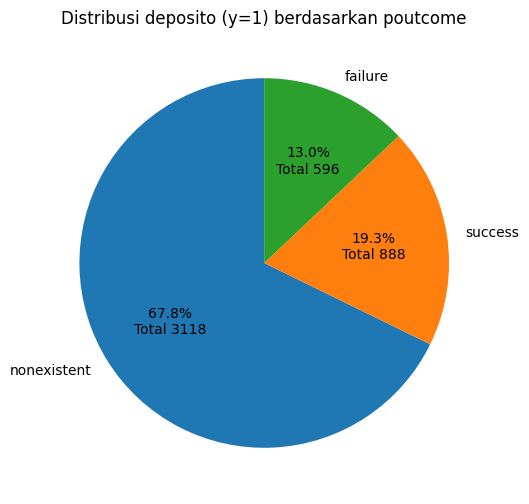

In [86]:
count_yes('poutcome')

Poutcome memiliki jumlah deposito tertinggi yaitu nonexistent hampir 68% dari seluruh jumlah poutcome yang lain, lalu poutcome success berjumlah sekitar 19.3% dan failure memiliki poutcome dengan jumlah presentase terendah yaitu 596 orang


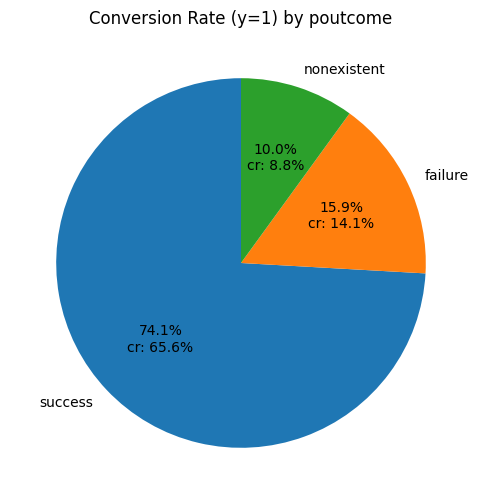

In [87]:
cr_yes('poutcome')

Poutcome success memiliki conversion rate tertinggi dengan 2.23 kali dari rata-rata, dan poutcome nonexistent memiliki conversion rate terendah yaitu 0.3 kali dari rata-rata, poutcome failure memiliki conversion rate sebesar 14.1%

#### Month

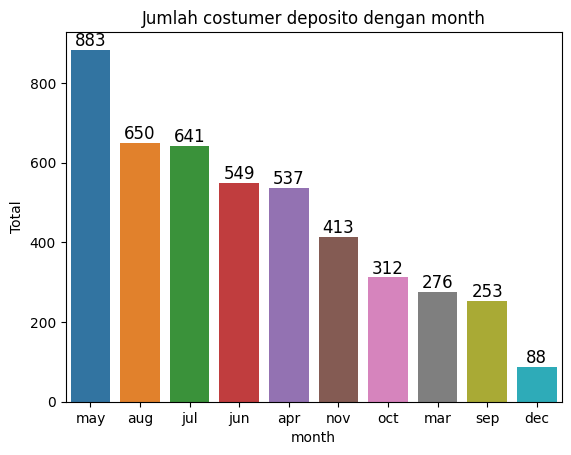

In [88]:
count_yes('month')

Jumlah deposito bervariasi setiap bulan. Tercatat bulai Mei memiliki angka tertinggi (833 orang atau 19.2 kali rata-rata) disusul agustus, Juni, Juli. April berada ditengah dan jumlah deposito dibawah rata-rata yaitu maret, september, oktober, december

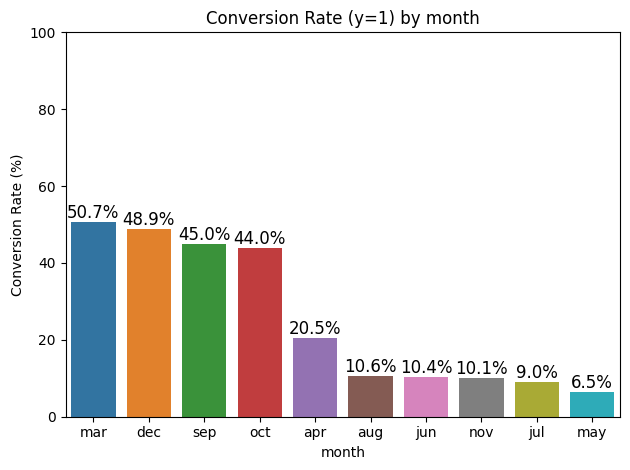

In [89]:
cr_yes('month')

Bulan maret memiliki performa terbaik dengan conversion rate tertinggi (50.7 persen), sementara itu conversion rate di bbulan april mencapai 20.5 persen dan conversion rate terendah adalah bulan may, juni, juli, november

#### Job

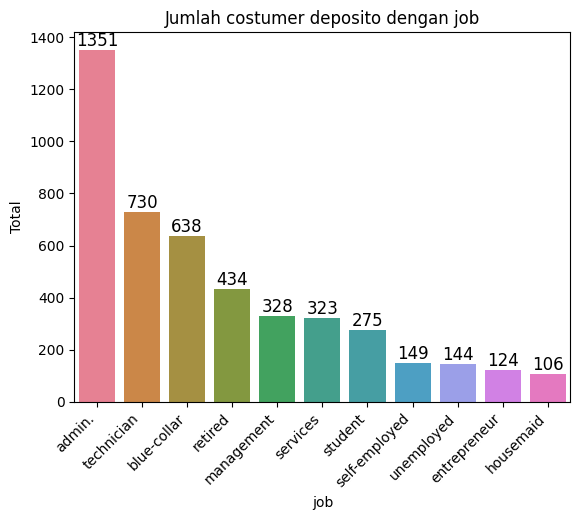

In [90]:
count_yes('job', geser=True)

Nasabah yang dengan jumlah deposito tertinggi adalah admin. (1351 orang) dan relatif tinggi adalah technician, blue-collar, dan retired. Sedangkan kelompok pekerjaan housemaid, entreoreneur dan self-employed memiliki jumlah deposito menengah hingga rendah

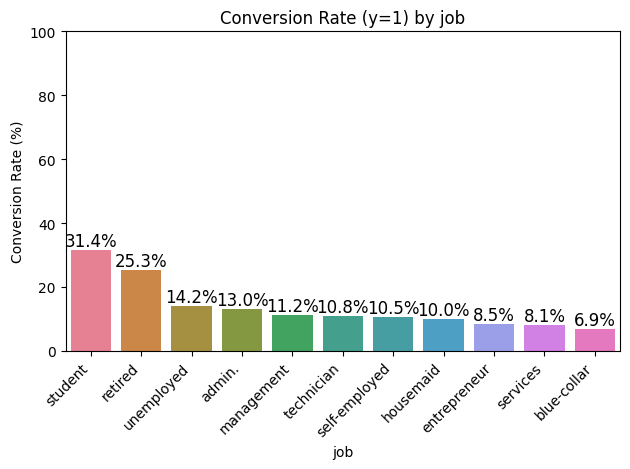

In [92]:
cr_yes('job', geser=True)

Conversion rate deposito dengan jenis pekerjaan, student memiliki tingkat konversi yang tinggi (31.4% ) diikuti dengan retired (25.3%), unemployed (14.2%) dan admin(13%). Sebaliknya kelompok blue-collar dan service memiliki tingkat konversi yang rendah. Sementara entrepreneur, self-employed, dan housemaid berada ditingkat menengah daripada kelompok pekerjaan lainnya

#### contact

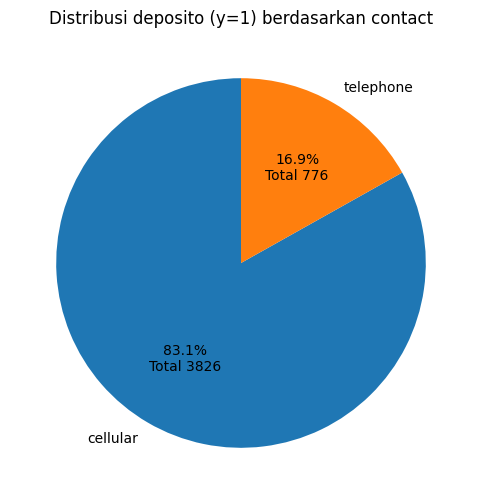

In [93]:
count_yes('contact')

Costumer terbanyak deposito berdasarkan contact adalah cellular berjumlah 3826 dengan perbedaan 4.93 kali dengan telephone

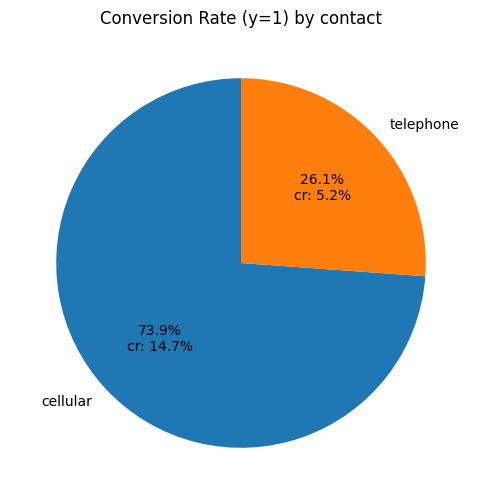

In [94]:
cr_yes('contact')

Costumer dengan conversion rate terbanyak untuk melakukan deposito berdasarkan contact adalah cellular berjumlah 14.7 persen dengan perbedaan 2.83 kali dengan telephone

#### default

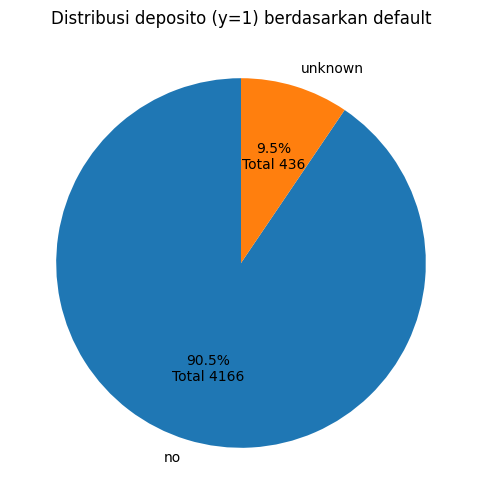

In [95]:
count_yes('default')

Costumer terbanyak melakukan deposito berdasarkan default adalah no berjumlah 9.56 kali dengan costumer unknown

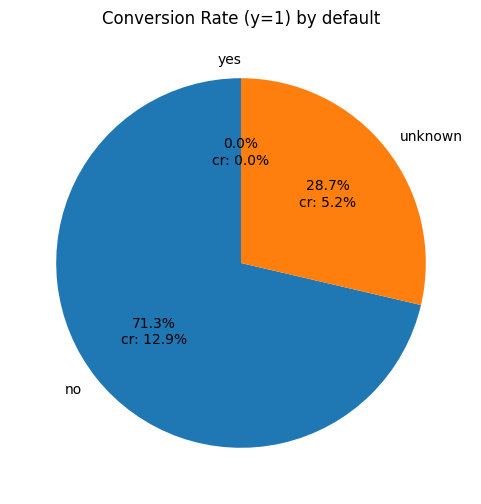

In [96]:
cr_yes('default')

Costumer dengan conversion rate tertinggi untuk melakukan deposito berdasarkan default adalah no berjumlah 2.48 dengan costumer unknown. Sementara itu conversion rate yes sama sekali tidak ada

#### Education

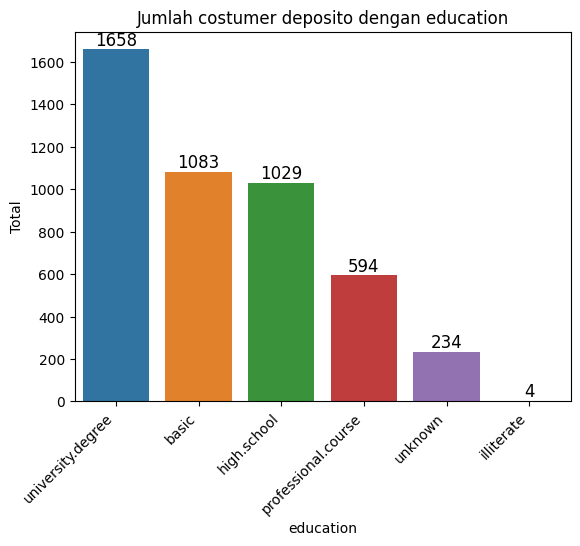

In [97]:
count_yes('education', geser=True)

Distribusi deposito untuk education university.degree mendominasi '36%' dari semua edukasi dan berlanjut untuk edukasi basic dan high.school, sementara deposito seseorang illiterate atau edukasi unknown sedikit

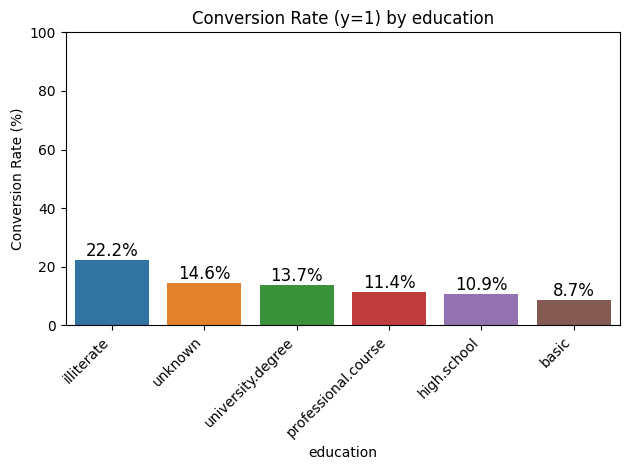

In [98]:
cr_yes('education', geser=True)

Konversi deposito untuk education unknown sangat tinggi (14.6 persen), dengan illiterate yang memiliki 22.2 % namun hanya berjumlah 4 orang, selanjutnya university.degree memiliki conversion rate 13.7% dan conversion rate terlemah adalah 8.7%

#### Marital

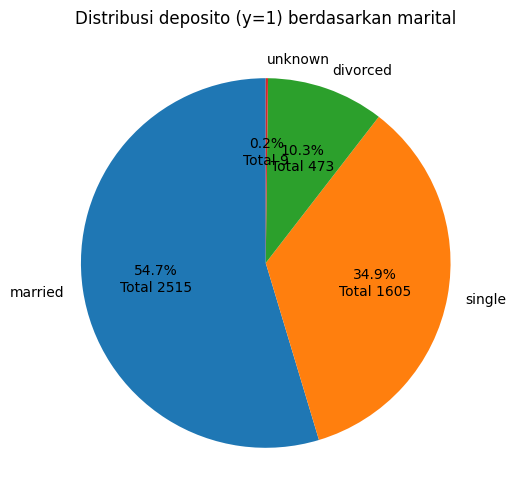

In [99]:
count_yes('marital')

Dari status pernikahan, nasabah dengan status married menjadi jumlah deposito tertinggi (2.515 orang), diikuti oleh single (1.605 orang). Sementara kategori unknown sangat minimal dibandingkan kelompok status pernikahan lainnya

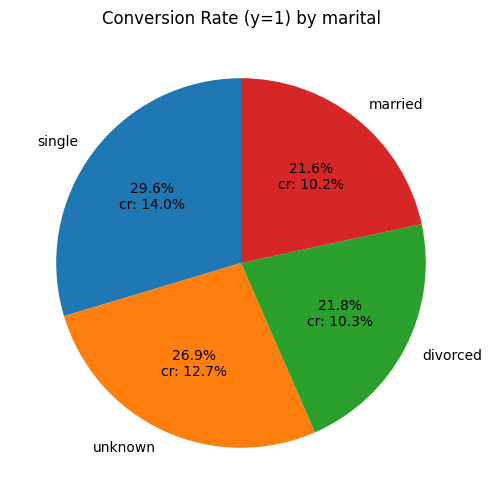

In [100]:
cr_yes('marital')

Dari status pernikahan, nasabah dengan status single menjadi conversion rate deposito tertinggi (14%). Sementara kategori divorced memiliki conversion rate 10.3% dan married berbeda dengan divorced sekitar 0.1%

#### **Column Number**

Variable euribor3m, cons.price.idx, dan cons.conf.idx secara ekonomi akan saling korelasi dengan alasan mempresentasikan data nasabah di realtime yang sama. Sehingga feature ini menjadi defektif terhadap diferensiasi segmen, sehingga fokus analisis diarahkan ke feature lain.

In [101]:
MannWhite.sort_values(by=['p_value', 'Rank-biserial'], ascending=[True, False])

feature        p_value  Rank-biserial
3  previous        0.000000e+00   0.217636     
2  pdays           0.000000e+00   0.191713     
6  euribor3m       0.000000e+00  -0.486649     
4  cons.price.idx  4.995183e-135 -0.221445     
1  campaign        1.389220e-37  -0.109955     
5  cons.conf.idx   1.075808e-16   0.074285     
0  age             1.791769e-02  -0.021378

Secara uji statistik, feature euribor3m memiliki perbedaan signifikan (p_value < 0.05) dan kekuatan yang hampir kuat dengan korelasi negatif (Rank-biserial -0.49 < 0.5), lalu diikuti dengan previous dan pdays yang memiliki korelasi kuat positif lemah dan terakhir cons.price.idx dan campaign yang memiliki hubungan dengan korelasi negatif lemah. Sementara itu cons.conf.idx dan age memiliki hubungan namun dengan korelasi sangat lemah

In [102]:
def count_yes_n(column, bins=5, qcutcutcus="cus", licus=None, geser=False, data=df):
    d = data[[column, 'y']].copy()

    # --- BINNING ---
    if qcutcutcus == "qcut":
        d['bin'] = pd.qcut(d[column], q=bins, duplicates='drop')
    elif qcutcutcus == "cut":
        d['bin'] = pd.cut(d[column], bins=bins)
    elif qcutcutcus == "ob":
        d['bin'] = licus
    elif qcutcutcus == 'cus':
        d['bins'] = d['bin'] = pd.cut(d[column], bins=licus)
    else:
        raise ValueError("strategy harus: 'qcut', 'cut', atau 'cus'")

    # --- AGGREGATION ---
    # Filter y==1 dan hitung dalam satu baris chain
    summary = d[d['y'] == 1].groupby('bin', observed=True)['y'].count().reset_index(name='total').sort_values('total', ascending=False)

    # --- PLOT ---
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=summary, x='bin', y='total', palette='viridis', hue='bin', legend=False)
    ax.set(title=f"Jumlah customer deposito (y=1) berdasarkan {column}", ylabel="Total", xlabel=column)

    if geser:
        plt.xticks(rotation=45, ha="right")

    # --- ANNOTATION ---
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), 
                ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()

In [103]:
def cr_yes_n(column, bins=5, qcutcutcus=None, licus=None, geser=False, data=df):
    d = data[[column, 'y']].copy()

    # --- BINNING LOGIC (Optimized) ---
    if qcutcutcus == "qcut":
        d['bin'] = pd.qcut(d[column], q=bins, duplicates='drop')
    elif qcutcutcus == "cut":
        d['bin'] = pd.cut(d[column], bins=bins)
    elif qcutcutcus == "ob":
        d['bin'] = licus
    elif qcutcutcus == 'cus':
        d['bins'] = d['bin'] = pd.cut(d[column], bins=licus)
    else:
        raise ValueError("strategy harus: 'qcut', 'cut', atau 'cus'")

    # --- CONVERSION RATE CALCULATION (Chained) ---
    # .mean() pada kolom berisi 0/1 otomatis menghitung CR
    summary = (
        d.groupby('bin', observed=True)['y']
        .mean()
        .mul(100) # Konversi ke persen
        .reset_index(name='cr')
        .sort_values('cr', ascending=False)
    )

    # --- PLOT (Optimized) ---
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=summary, x='bin', y='cr', palette='viridis', hue='bin', legend=False)
    
    ax.set(
        title=f"Conversion Rate (y=1) berdasarkan {column}",
        ylabel="Conversion Rate (%)",
        xlabel=column,
        ylim=(0, 100)
    )

    if geser:
        plt.xticks(rotation=45, ha="right")

    # --- ANNOTATION (Optimized) ---
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), 
                f"{p.get_height():.1f}%", 
                ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()


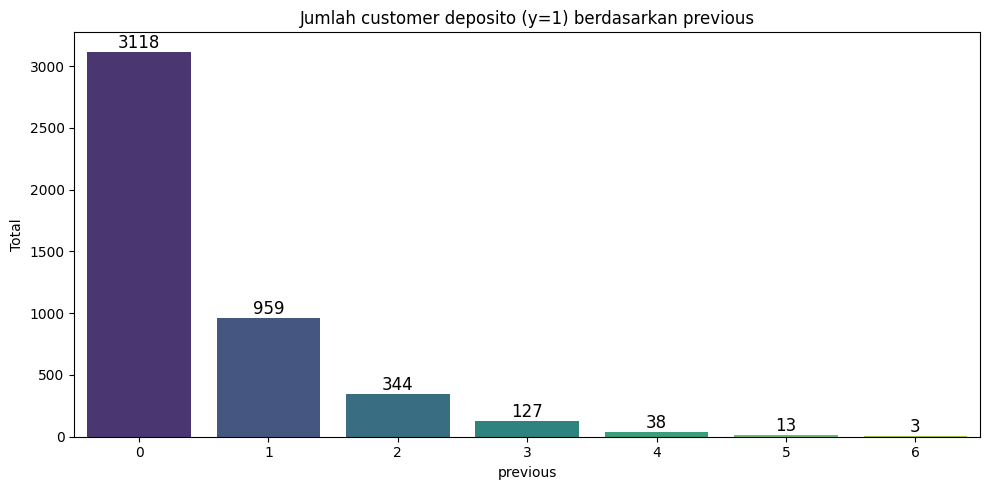

In [104]:
count_yes_n('previous', qcutcutcus="ob", licus=df['previous'].astype(str))

Jumlah customer yang tidak memiliki kontak sebelum dari bank ini memiliki data paling banyak daripada yang lain berlanjut jika customer pernah sekali berkontak dengan bank dan seterusnya

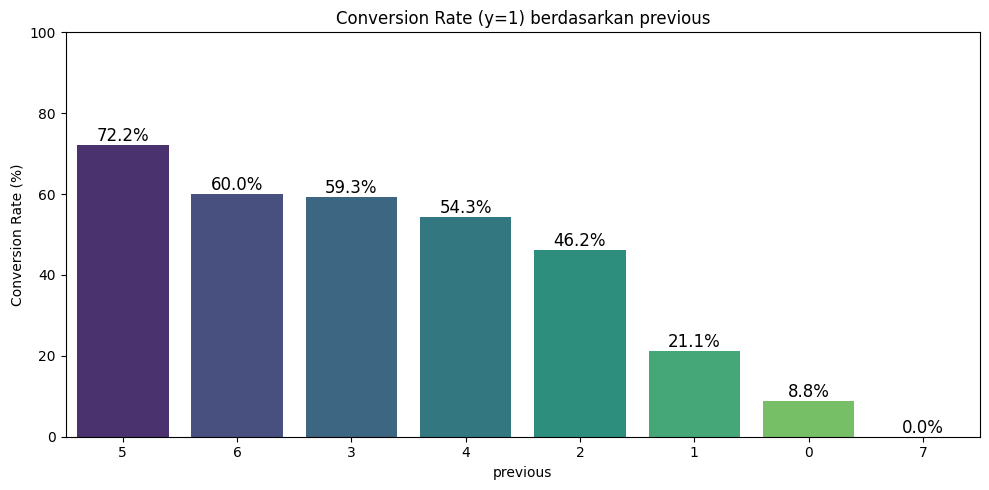

In [105]:
cr_yes_n("previous", qcutcutcus="ob", licus=df['previous'].astype(str))

Conversion rate paling tinggi dari previous ini adalah customer yang sudah di kontak berkali-kali dan yang customer baru pertama kali dikontak memiliki conversion rate yang rendah

#### Pdays

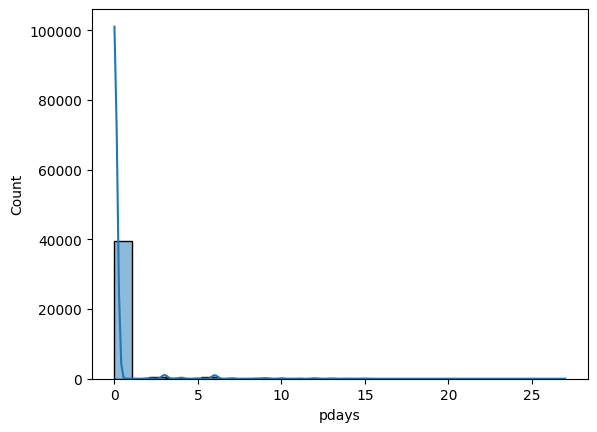

In [106]:
col = 'pdays'
sns.histplot(df[col], bins=df[col].nunique(), kde=True)
plt.show()

In [107]:
len(df[df['pdays'] == 0])

39366

Jumlah customer yang tidak pernah menghubungi klien memiliki data terbayak (39366)

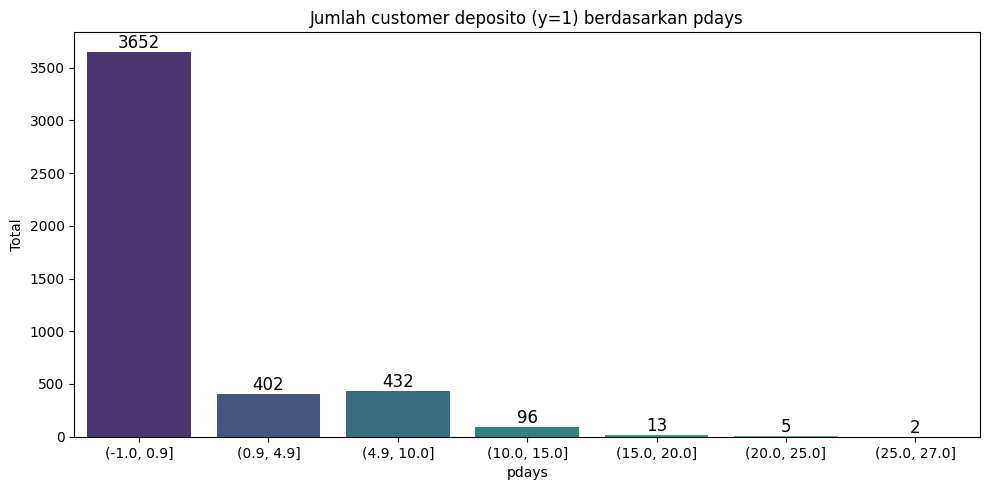

In [108]:
count_yes_n('pdays', qcutcutcus="cus", licus=[-1, 0.9, 4.9, 10, 15, 20, 25, df['pdays'].max()])

Jumlah customer yang melakukan deposito sejak tidak pernah dihubungi memiliki jumlah yang sangat banyak (3660) dan diikuti 10 hari terakhir customer pernah dihubungi berjumlah 834 customer, sementara itu customer yang pernah dihubungi bank 10 hari lebih memiliki data paling sedikit

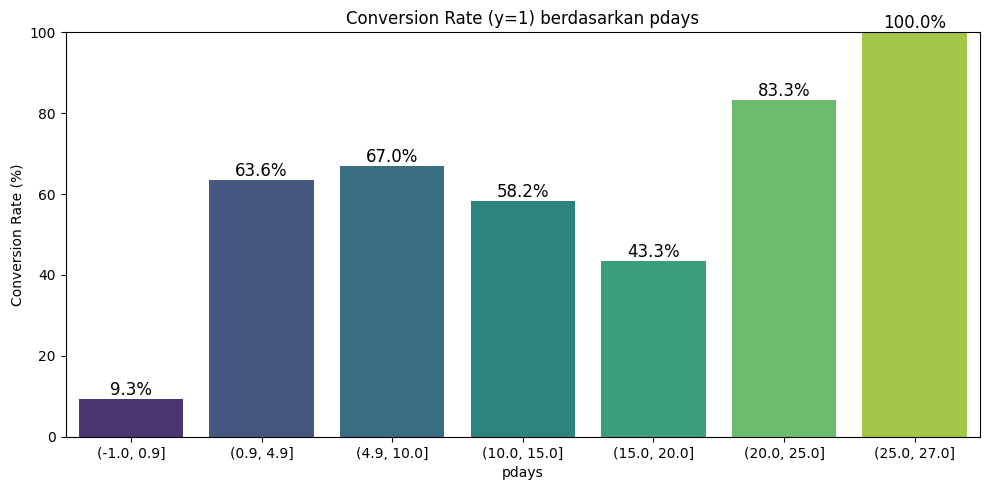

In [109]:
cr_yes_n('pdays', qcutcutcus="cus", licus=[-1, 0.9, 4.9, 10, 15, 20, 25, df['pdays'].max()])

Conversion rate customer yang melakukan deposito sejak tidak pernah dihubungi memiliki tingkat terendah (9.3%) dan diikuti 10 hari terakhir customer pernah dihubungi sekitar 65.3%, sementara itu jika lebih dari 10 hari customer memiliki majoritas conversion rate paling tinggi

#### euribor3m

Data : euribor3m memiliki data tidak normal, lebih baik menggunakan qcut

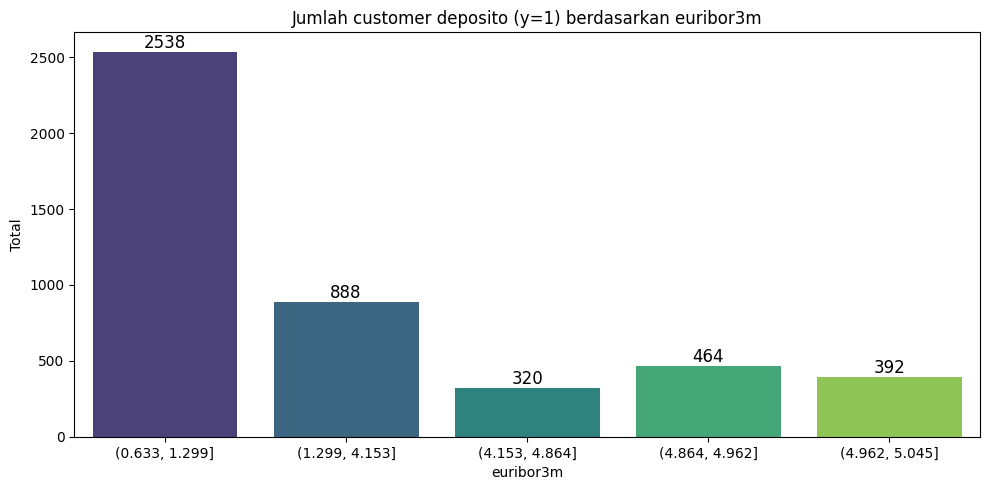

In [110]:
count_yes_n('euribor3m', qcutcutcus="qcut")

Feature number euribor3m memiliki jumlah terbanyak untuk deposito sekitar 0.633 - 1.299, dan rentan area jarak terbesar yaitu 1.299 hingga 4.153

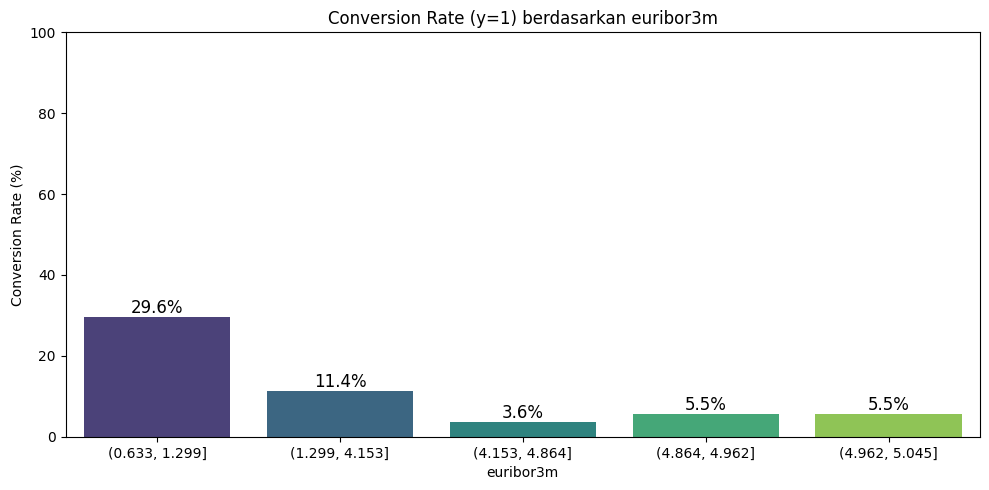

In [111]:
cr_yes_n('euribor3m', qcutcutcus="qcut")

Feature number euribor3m memiliki conversion rate tertinggi untuk deposito sekitar 0.633 - 1.299 (29.6%), dan rentan area jarak terbesar yaitu 1.299 hingga 4.153

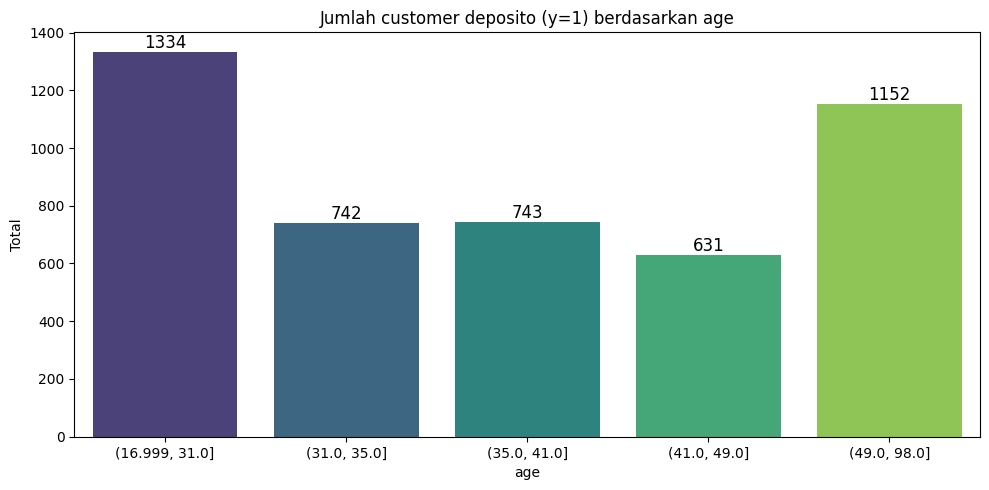

In [112]:
count_yes_n('age', qcutcutcus="qcut")

Umur 17 - 31 tahun dan 49 - 98 tahun memiliki jumlah deposito paling tinggi, dengan umur sekitar 31 - 41 memiliki jumlah deposito yang standar dan deposito terendah sekitar umur 41-49

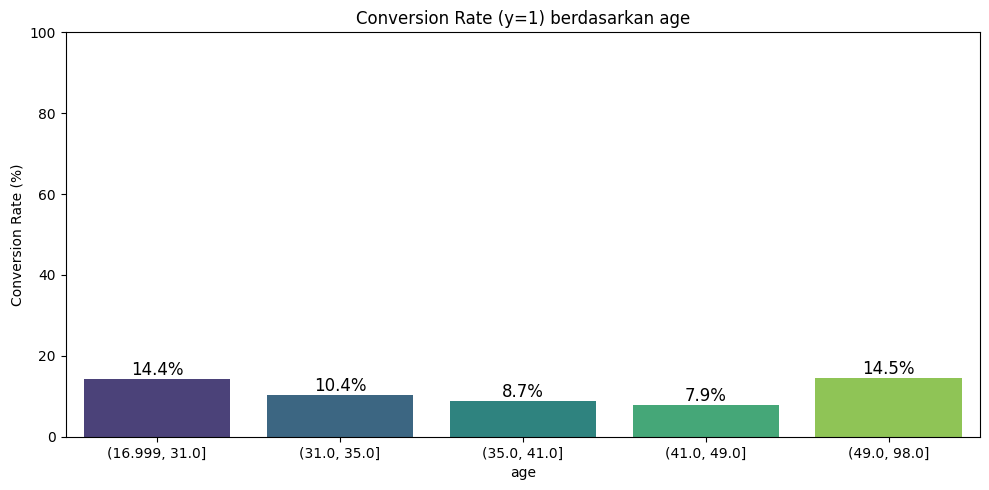

In [114]:
cr_yes_n('age', qcutcutcus="qcut")

Umur 17 - 31 tahun dan 49 - 98 tahun memiliki conversion rate deposito paling tertinggi, dengan umur sekitar 31 - 41 memiliki jumlah deposito yang standar dan deposito terkecil sekitar umur 41-49

**Insight semua :**

'Job dari Nasabah merupakan admin sangat banyak terdata oleh bank dengan berjumlah 1351 orang walaupun conversion ratenya mendekati ratat-rata, sementara itu nasabah yang merupakan memiliki sedikit data namun memiliki conversion rate tinggi adalah housemaid dan enterpreneur. Blue-collar dan retired tercatat banyak data namun memiliki konversi rate yang rendah'

'Edukasi terakhir setiap nasabah dengan jumlah terbanyak adalah Univesity.degree dan didampingi basic dan high.school namun dari conversion rate hampir sama dengan Univesity.degree dan didampingi basix dan high.shool'

'Status pernikahan yang memiliki data sangat banyak adalah seseorang yang sudah menikah dan diikuti seorang lajang, namun dari conversion rate seseorang menikah memiliki tingkat lebih kecil daripada seseorang yang menikah dimana memiliki status paling tinggi selain status cerai atau tidak diketahui'

'Komunikasi dengan nasabah dengan costumer menggunakan cellular memiliki jumlah (83.1% dari total) dan conversion rate lebih tinggi daripada telephone

'Status default atau apakah nasabah punya hutang dan apakah bisa membayar memiliki jumlah 9.6 kali lebih banyak daripada status tidak diketahui dan conversion rate dengan status tidak hanya sekitar 12.9%'

'Status bulan yang melakukan deposito paling banyak adalah May, agustus, Juni, Juli namun memiliki conversion rate yang rendah dari semua bulan, sementara itu Maret, september, Oktober, dan December memiliki nasabah yang memilih deposito atau tidak berjumlah sedikit namun memiliki conversion rate yang tinggi, namun bulan april memiliki jumlah dan conversion rate kurang tapi mendekati rata-rata dan bulan dengan performa buruk ada di november'

'Customer yang tidak memiliki kontak dan melakukan deposito memiliki jumlah sangat banyak namun memiliki conversion rate paling kecil, namun untuk customer yang sudah berkali-kali dikontak (maksimal 6 kali kontak) memiliki conversion rate lebih tinggi walauupun jumlahnya sangat sedikit'

'Customer yang tidak pernah dihubungi orang bank memiliki jumlah terbanyak namun memiliki conversion rate yang paling kecil (9.3%) dari semua, dan untuk customer yang pernah dihubungi bank 10 hari terakhir memiliki jumlah sangat banyak dengan rata-rata conversion rate 65.3% , sementara itu jika customer yang lebih dari 10 hari memiliki sangat sedikit yang terdata namun memiliki rata-rata conversion tinggi dari yang lain'

'Customer yang memiliki umur antara 17 - 31 tahun dan 49 -98 tahun memiliki jumlah terbanyak untuk melakukan deposito dengan korelasi lebih tinggi dari yang lain. Namun umur 31 - 49 tahun memiliki jumlah dan conversion rate lebih kecil'

---

## **Modeling and Evaluation**

#### **Cross Validation**
Fungsinya untuk mengukur seberapa andal model akan bekerja pada data baru dan mencegah kesimpulan yangg keliru akibat satu kali pembagian data.

In [136]:
from imblearn.pipeline import Pipeline

In [139]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
knn    = KNeighborsClassifier()
dt     = DecisionTreeClassifier(random_state=42)
rf     = RandomForestClassifier(random_state=42)

xgb = XGBClassifier(
    random_state=42,
    eval_metric="logloss",
    use_label_encoder=False
)

lgbm = LGBMClassifier(random_state=42)

models = [logreg, knn, dt, rf, xgb, lgbm]
model_names = ["LogReg", "KNN", "DecisionTree", "RandomForest", "XGBoost", "LightGBM"]


# CV + SCORER (Recall)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
recall_scorer = make_scorer(recall_score, pos_label=1)

# Oversampling (optional)
ros = RandomOverSampler(random_state=42)


In [140]:
#Model Sebelum Oversampling
score, rata, std = [], [], []

for name, model in zip(model_names, models):
    estimator = Pipeline(steps=[
        ("preprocess", transformer),
        ("model", model)
    ])

    cv_results = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring=recall_scorer,
        n_jobs=-1,
        error_score="raise"
    )

    score.append(name)
    rata.append(cv_results.mean())
    std.append(cv_results.std())

result_no_os = pd.DataFrame({
    "model": score,
    "recall_mean": rata,
    "recall_std": std
}).sort_values("recall_mean", ascending=False)

result_no_os

model  recall_mean  recall_std
2  DecisionTree  0.328347     0.011427  
3  RandomForest  0.288160     0.009200  
4  XGBoost       0.279474     0.012902  
5  LightGBM      0.259643     0.008574  
1  KNN           0.246883     0.014316  
0  LogReg        0.224882     0.008982

Hasil cross-validation tanpa oversampling menunjukkan bahwa seluruh model memiliki recall rendah (<0.35), yang mengindikasikan bahwa data imbalance sangat mempengaruhi kemampuan model dalam mendeteksi kelas positif. Oleh karena itu, tahap selanjutnya adalah menerapkan teknik oversampling untuk meningkatkan sensitivitas model terhadap kelas minoritas.

In [141]:
#Model Sesudah Over sampling
score, rata, std = [], [], []

for name, model in zip(model_names, models):
    estimator = Pipeline(steps=[
        ("preprocess", transformer),
        ("oversample", ros),
        ("model", model)
    ])

    cv_results = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring=recall_scorer,
        n_jobs=-1,
        error_score="raise"
    )

    score.append(name)
    rata.append(cv_results.mean())
    std.append(cv_results.std())

result_os = pd.DataFrame({
    "model": score,
    "recall_mean": rata,
    "recall_std": std
}).sort_values("recall_mean", ascending=False)

result_os

model  recall_mean  recall_std
0  LogReg        0.634436     0.021722  
5  LightGBM      0.628457     0.024519  
4  XGBoost       0.565459     0.015748  
1  KNN           0.521989     0.021311  
3  RandomForest  0.387840     0.014107  
2  DecisionTree  0.322931     0.015426

Berdasarkan hasil modeling di atas, disimpulkan modeling yang paling cocok adalah **Logistic Regression**. Logistic Regression adalah model klasifikasi yang memprediksi **probabilitas** apakah seorang nasabah akan berlangganan deposito berjangka (Yes) atau tidak (No).

Hasil dari proses tersebut berupa **nilai probabilitas**, bukan langsung keputusan. Probabilitas ini kemudian dibandingkan dengan **decision threshold** untuk menentukan prediksi akhir Yes atau No. Threshold dapat disesuaikan agar model lebih fokus menangkap nasabah potensial (meningkatkan recall) tanpa mengorbankan precision secara berlebihan.

Logistic Regression juga relatif **stabil pada data tidak seimbang**, terutama ketika dikombinasikan dengan teknik oversampling dan threshold tuning.

Keunggulan utama model ini adalah **mudah diinterpretasikan**, efisien secara komputasi, dan menghasilkan output probabilistik yang fleksibel, sehingga sangat sesuai digunakan untuk pengambilan keputusan bisnis di sektor perbankan.

#### **Hyperparameter Tuning**

In [142]:
pipe_logreg_os = Pipeline(steps=[
    ("preprocess", transformer),
    ("oversample", ros),
    ("model", LogisticRegression(
        solver="saga",
        penalty="elasticnet",
        max_iter=5000,
        random_state=42
    ))
])

param_dist = {
    "model__C": loguniform(1e-4, 10),          
    "model__l1_ratio": uniform(0.1, 0.9),     
    "model__class_weight": [None, "balanced"]
}

rand_os = RandomizedSearchCV(
    estimator=pipe_logreg_os,
    param_distributions=param_dist,
    n_iter=30,                 
    scoring=recall_scorer,
    cv=skfold,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rand_os.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(transformers=[('robust',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['campaign',
                                                                                'previous',
                                                                                'pdays',
                                                                                'cons.price.idx',
                                                                                'cons.conf.idx',
                                                                                'euribor3m']),
                                                                              ('bin_age',
                                                                               Pipeline(st...
                   param_distributions={'model__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001951D074590>,
                                        'model__class_weight': [None,
                                                                'balanced'],
                                        'model__l1_ratio': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019520C6F890>},
                   random_state=42,
                   scoring=make_scorer(recall_score, response_method='predict', pos_label=1),
                   verbose=1)

In [143]:
print("Best Recall CV (OS):", rand_os.best_score_)
print("Best Params (OS):", rand_os.best_params_)

best_model = rand_os.best_estimator_

Best Recall CV (OS): 0.7129225414429827
Best Params (OS): {'model__C': np.float64(0.0004075596440072873), 'model__class_weight': None, 'model__l1_ratio': np.float64(0.849875420562548)}


Hasil tuning menunjukkan bahwa konfigurasi terbaik untuk meningkatkan recall adalah model yang:
- Menggunakan **ElasticNet** dengan dominasi L1 (l1_ratio tinggi) agar model lebih selektif terhadap fitur penting,
- Memakai **regularisasi kuat** (C yang kecil) untuk menjaga generalisasi,
- Mengandalkan **oversampling** sebagai strategi utama penyeimbangan kelas (sehingga `class_weight` tidak perlu diaktifkan).

#### **Treshold Tuning**

In [144]:
# probabilitas kelas positif (test set)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# threshold standar
threshold = 0.50
y_pred_05 = (y_proba_test >= threshold).astype(int)

print("\n=== Test Evaluation (Threshold = 0.5) ===")
print("Threshold:", threshold)
print(classification_report(y_test, y_pred_05, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_05))
print("ROC AUC:", roc_auc_score(y_test, y_proba_test))



=== Test Evaluation (Threshold = 0.5) ===
Threshold: 0.5
              precision    recall  f1-score   support

           0      0.952     0.722     0.821      7250
           1      0.245     0.711     0.364       920

    accuracy                          0.721      8170
   macro avg      0.598     0.716     0.593      8170
weighted avg      0.872     0.721     0.770      8170

Confusion Matrix:
 [[5234 2016]
 [ 266  654]]
ROC AUC: 0.7631755622188905


In [145]:
# probabilitas kelas positif (test set)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# percobaan threshold 0.3
threshold = 0.3
y_pred_05 = (y_proba_test >= threshold).astype(int)

print("\n=== Test Evaluation (Threshold = 0.3) ===")
print("Threshold:", threshold)
print(classification_report(y_test, y_pred_05, digits=3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_05))
print("ROC AUC:", roc_auc_score(y_test, y_proba_test))


=== Test Evaluation (Threshold = 0.3) ===
Threshold: 0.3
              precision    recall  f1-score   support

           0      0.000     0.000     0.000      7250
           1      0.113     1.000     0.202       920

    accuracy                          0.113      8170
   macro avg      0.056     0.500     0.101      8170
weighted avg      0.013     0.113     0.023      8170

Confusion Matrix:
 [[   0 7250]
 [   0  920]]
ROC AUC: 0.7631755622188905


c:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### **Confusion Matrix**

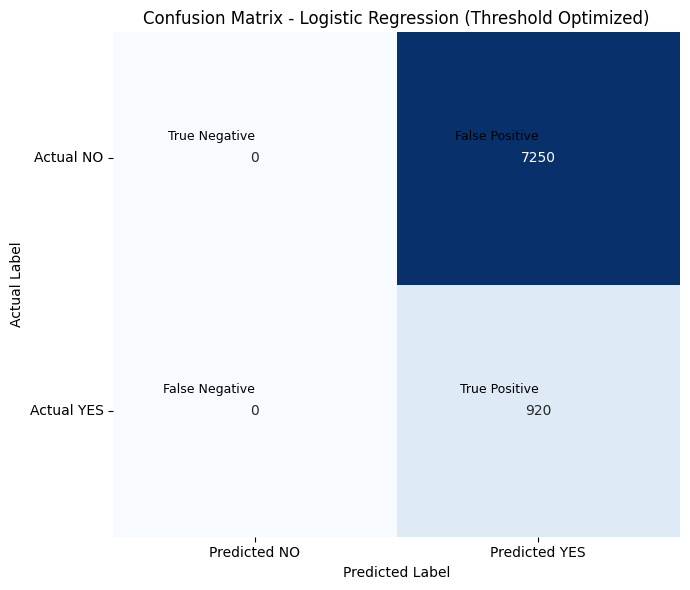

In [146]:
# hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_05)


plt.figure(figsize=(7, 6))
ax = sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False
)

# Label sumbu
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")

ax.set_xticklabels(["Predicted NO", "Predicted YES"])
ax.set_yticklabels(["Actual NO", "Actual YES"], rotation=0)

# Tambahkan keterangan tiap kotak
ax.text(0.5, 0.5, "\nTrue Negative\n", ha="right", va="bottom", color="black", fontsize=9)
ax.text(1.5, 0.5, "\nFalse Positive\n", ha="right", va="bottom", color="black", fontsize=9)
ax.text(0.5, 1.5, "\nFalse Negative\n", ha="right", va="bottom", color="black", fontsize=9)
ax.text(1.5, 1.5, "\nTrue Positive\n", ha="right", va="bottom", color="black", fontsize=9)

plt.title("Confusion Matrix - Logistic Regression (Threshold Optimized)")
plt.tight_layout()
plt.show()

Berdasarkan confusion matrix (treshold default) di atas didapatkan hasil sebagai berikut:   
Biaya FP = 2016 × £100 = £201.600  
Biaya FN = 266 × £1000 = £266.000  
Total cost = **£467.600**

Namun, jika dibandingkan treshold 0.3, hasilnya:  
Biaya FP = 7250 × £100 = £725,000  
Biaya FN = 0 × £1000 = £0  
Total Cost = **£725,000**

Threshold 0.3 jauh **lebih mahal** secara bisnis, karena semua diprediksi "yes". Hal ini mengakibatkan FN nol tapi FP meledak, yang artinya **recall maksimum tidak membuat cost minimum**.

Treshold default (0.5) sudah paling **optimal**.


In [147]:
# Simpan model terbaik 
with open('best_logreg_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(" Model berhasil disimpan ke 'best_logreg_model.pkl'")

 Model berhasil disimpan ke 'best_logreg_model.pkl'


### **Feature Importances**

In [148]:
preprocessor = best_model.named_steps["preprocess"]
logreg_model = best_model.named_steps["model"]

feature_names = []

for name, transformer, cols in preprocessor.transformers_:
    if name == "remainder":
        continue

    if hasattr(transformer, "named_steps"):
        last_step = list(transformer.named_steps.values())[-1]
    else:
        last_step = transformer

    if hasattr(last_step, "get_feature_names_out"):
        fn = last_step.get_feature_names_out(cols)
    else:
        fn = cols

    feature_names.extend(fn)

In [149]:
coef = logreg_model.coef_[0]

feature_importance = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coef,
    "abs_coefficient": np.abs(coef)
}).sort_values("abs_coefficient", ascending=False)

feature_importance.head(10)

feature  coefficient  abs_coefficient
5   euribor3m         -0.898387     0.898387       
2   pdays              0.215569     0.215569       
52  month_may         -0.024130     0.024130       
0   campaign          -0.008767     0.008767       
42  day_of_week_mon    0.000000     0.000000       
31  loan_unknown       0.000000     0.000000       
32  loan_yes           0.000000     0.000000       
33  contact_cellular   0.000000     0.000000       
34  contact_telephone  0.000000     0.000000       
35  poutcome_failure   0.000000     0.000000

C:\Users\User\AppData\Local\Temp\ipykernel_16180\2296222948.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


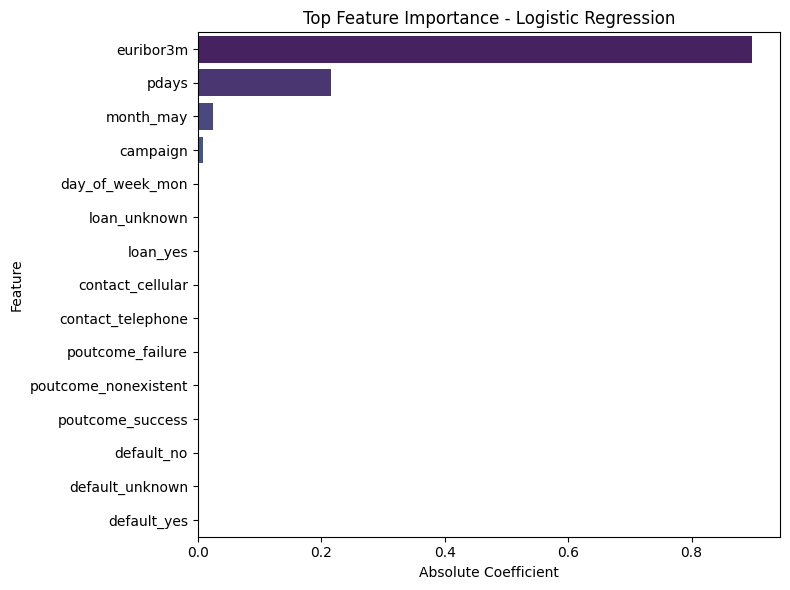

In [150]:
top_n = 15

plt.figure(figsize=(8, 6))
sns.barplot(
    data=feature_importance.head(top_n),
    x="abs_coefficient",
    y="feature",
    palette="viridis"
)
plt.title("Top Feature Importance - Logistic Regression")
plt.xlabel("Absolute Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### **SHAP**

In [151]:
preprocess = best_model.named_steps["preprocess"]
model = best_model.named_steps["model"]


In [152]:
X_train_trans = preprocess.transform(X_train)
X_test_trans  = preprocess.transform(X_test)

In [153]:
feature_names = preprocess.get_feature_names_out()

In [156]:
import shap

explainer = shap.LinearExplainer(
    model,
    X_train_trans,
    feature_perturbation="interventional"
)

c:\Users\User\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\User\miniconda3\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [157]:
shap_values = explainer.shap_values(X_test_trans)


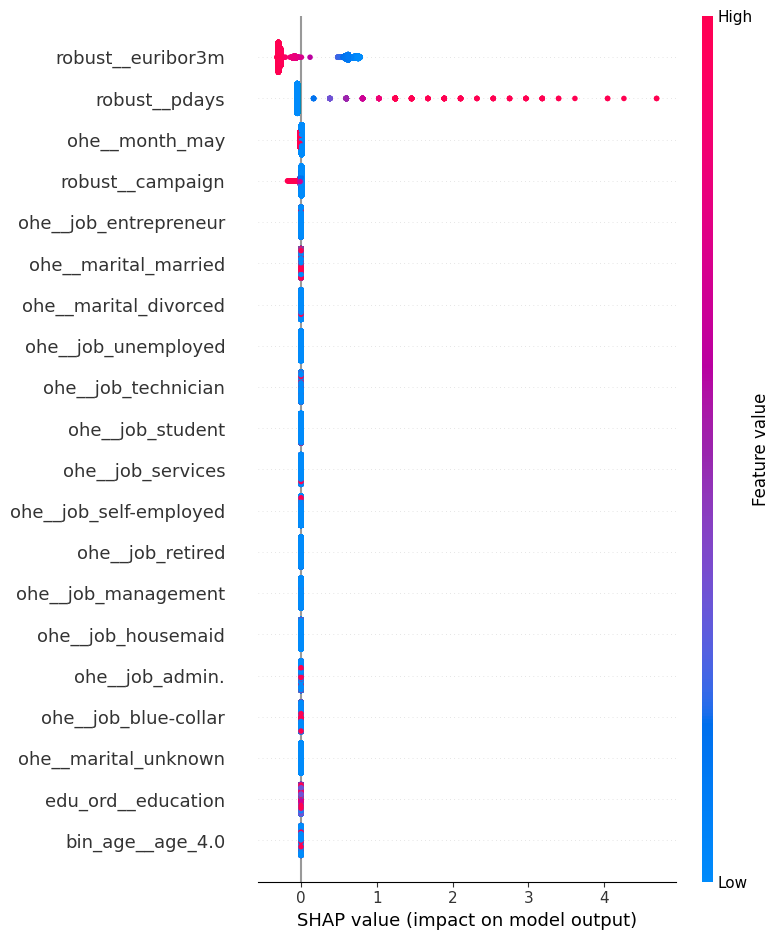

In [158]:
shap.summary_plot(
    shap_values,
    X_test_trans,
    feature_names=feature_names,
    max_display=20
)


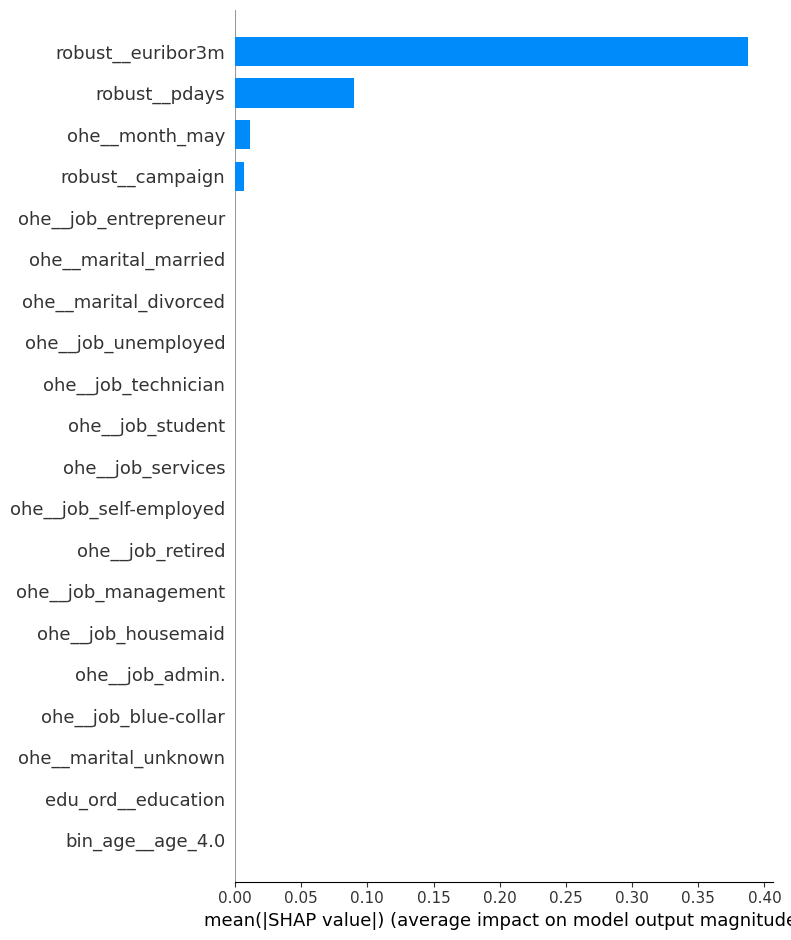

In [159]:
shap.summary_plot(
    shap_values,
    X_test_trans,
    feature_names=feature_names,
    plot_type="bar",
    max_display=20
)


## **Conclusion and Recomendation**

#### **Kesimpulan**

Keputusan nasabah untuk berlangganan deposito lebih dipengaruhi oleh kondisi **makroekonomi** dan **riwayat interaksi campaign** dibandingkan faktor **demografis**.
Variabel **euribor3m** dan **pdays** mendominasi kontribusi model, sementara usia, pekerjaan, status pernikahan, dan pendidikan memiliki pengaruh yang relatif kecil.

1. robust__euribor3m → Faktor paling dominan (**NEGATIF**)  
    - Memiliki meanSHAP paling besar 
    - Nilai euribor3m tinggi (warna merah):
        * Memberi SHAP negatif
        * Menurunkan probabilitas subscription
    - Nilai euribor3m rendah: 
        * Mendorong prediksi ke y = 1  

    **Artinya:** Ketika suku bunga tinggi, hampir semua segmen nasabah cenderung tidak tertarik pada produk deposito


2. robust__pdays → Indikator kuat hubungan historis (**POSITIF**)
    - SHAP menunjukkan kontribusi positif besar pada subscription
    - Semakin lama jarak sejak kontak terakhir (pdays besar):
        * Semakin tinggi probabilitas subscribe  

    **Artinya:** Nasabah yang tidak terlalu sering dihubungi cenderung lebih responsif


3. ohe__month_may dan robust__campaign → Efek moderat
    - Bulan Mei menunjukkan kecenderungan sedikit lebih positif
    - Jumlah kontak (campaign):
        * Kontribusinya kecil dan cenderung negatif 

    **Artinya:** Intensitas campaign harus dikontrol; lebih banyak kontak tidak selalu berarti lebih efektif.


4. Variabel demografis (usia, pekerjaan, status pernikahan, pendidikan)
    - Hampir seluruh fitur demografis memiliki **SHAP value sangat kecil** yang tidak menunjukkan arah pengaruh yang konsisten
    - Bin usia (bin_age__age_4.0) berada di urutan terbawah  

    **Artinya:** Segmentasi demografis bukan faktor pembeda utama dalam keputusan subscribe.

#### **Rekomendasi**

1. Jadikan kondisi ekonomi (euribor3m) sebagai primary decision trigger  
**Jangan menjalankan campaign masif saat euribor3m tinggi**

    Dampak bisnis:
    - Mengurangi FP mahal (contact sia-sia)
    - Meningkatkan ROI campaign tanpa mengubah model

2. Prioritaskan nasabah dengan pdays tinggi  
**pdays berkontribusi positif besar terhadap probabilitas subscribe**
    Fokus pada nasabah yang:
    - Sudah lama tidak dihubungi
    - Tidak mengalami “contact fatigue"

    Dampak bisnis:
    - Recall naik tanpa menaikkan FP ekstrem
    - Mengurangi FN yang mahal (£1000 per kejadian)

3. Batasi intensitas kontak (campaign)
**Jumlah kontak tinggi tidak meningkatkan peluang subscribe.**  
    - Tetapkan hard cap jumlah kontak per nasabah
    - Hindari re-contact agresif pada nasabah yang sudah menolak

    Dampak bisnis:
    - Mengurangi FP
    - Menurunkan biaya operasional call center

4. Kurangi ketergantungan pada segmentasi demografis
**Usia, pekerjaan, status pernikahan, dan pendidikan memiliki SHAP sangat kecil**  
    - Jangan menjadikan usia atau pekerjaan sebagai filter utama
    - Gunakan demografi hanya sebagai informasi pendukung, bukan kriteria seleksi

Berdasarkan analisis feature importance dan SHAP, strategi campaign yang optimal sebaiknya berfokus pada kondisi makroekonomi dan histori interaksi nasabah, bukan segmentasi demografis. Perusahaan sebaiknya mengintensifkan campaign hanya pada periode suku bunga rendah, memprioritaskan nasabah dengan jarak kontak yang panjang, serta membatasi intensitas kontak berulang. Logistic Regression dengan threshold berbasis cost merupakan pendekatan yang paling stabil dan efektif untuk meminimalkan kerugian bisnis akibat False Negative yang mahal.